In [1]:
#!pip install --user -r requirements.txt

In [125]:
import warnings
warnings.filterwarnings("ignore")
import random
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
# Set up TWINT config
import twint
# Solve compatibility issues with notebooks and RunTime errors.
import nest_asyncio

# stopword
import nltk
from nltk.corpus import stopwords
nltk.download("vader_lexicon")
nltk.download('stopwords')
sw_nltk = stopwords.words('english')

import re
text_cleaning_regex = "@S+|https?:S+|http?:S|[^A-Za-z0-9]+"

from keras.models import Sequential
from keras.layers import LSTM,Flatten,Embedding,Dense,Conv2D,MaxPooling2D,Conv1D


# sklearn
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# bert
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler, WeightedRandomSampler,random_split
from transformers import BertModel,BertForSequenceClassification, Trainer, TrainingArguments, AutoTokenizer, AdamW, get_linear_schedule_with_warmup


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/swu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/swu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
# check the device
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [10]:
nest_asyncio.apply()
c = twint.Config()
c.Search = "BTC"
c.Lang = "en"
c.Store_pandas = True
# c.Store_csv = True
# c.Output = "test.csv"
c.Since = '2022-02-01'
c.until= '2022-02-21'
c.Min_replies = 10
c.Pandas = True
twint.run.Search(c)

1496248622278750211 2022-02-22 14:20:45 -0800 <Giviyt_NFT> 🚀QUICK #GIVEAWAY  TIME 🚀  💵Reward: 500$ ⏳1 winner will be announced in 3h!  Join: 🔥 Follow @Giviyt_NFT ❤️Like + RT our last 5 tweets  ⚡️Drop your wallet address w/ tagging your friends  #Airdrop #NFTGiveaway #NFTCommunity #crypto #NFTdrop #ETH #NFT #BTC #NFT #NFTs
1496246972608663563 2022-02-22 14:14:11 -0800 <crypto_iso> Will the start of the sanctions trigger a rally in BTC?
1496241081025024011 2022-02-22 13:50:47 -0800 <nic__carter> without commenting on the sustainability of UST, a Bitcoin reserve backing a stablecoin is an elegant way to harmonize the revealed preference of crypto users to transact with stables with the monetary soundness of BTC
1496237135334100992 2022-02-22 13:35:06 -0800 <juanencripto> ¿A qué precio de #BTC en #USD dirías que este experimento de #Bitcoin llegó a su fin?
1496236926596177921 2022-02-22 13:34:16 -0800 <OL5ON> I saved up some binance smart chain BTC with my divs for months😅 The place I stak

1496199422044160004 2022-02-22 11:05:14 -0800 <Bybit_Official> 🚀 Deposit Blast-Off!  💰 From now till March 7, get bonuses when your $BTC, $ETH, $XRP, $USDT net deposits meet:  ✅ ≥ $5,000 = $50 bonus ✅ ≥ $10,000 = $110 bonus ✅ ≥ $25,000 = $280 bonus ✅ ≥ $50,000 = $580 bonus ✅ ≥ $100,000 = $1,200 bonus  👉  https://t.co/YJzb8mTvNA  https://t.co/jLRxENaVH8
1496198605908156416 2022-02-22 11:02:00 -0800 <crypto_birb> $BTC has been chopped big time recently. It's difficult to find actual trends in there, while it's swinging back and forth. If looking for some free materials to help you trade through this noise, my nestletter is coming your way at no charge.  Free copy:  https://t.co/uUfRKU28vT  https://t.co/g5CQy5Dmcd
1496197218851766273 2022-02-22 10:56:29 -0800 <terraformersapp> Going to be giveaways everyday for the next week, all distributed on Feb 23rd.  "Jagged Bluffs"   1. Like, retweet &amp; follow 2. Comment your Wax wallet and @ three friends 3. Join our Discord  #wax #nft #p2e #btc

1496180075951239169 2022-02-22 09:48:22 -0800 <BigCheds> $BTC #Bitcion weekly MA 200 currently $20070
1496179798678331410 2022-02-22 09:47:16 -0800 <Cryptodepapell> Bitcoin’de önemli destek 38.000-39.00 $ ve kilit direnç 41.000-42.00 $ arasında kaldığımız için bu haftanın sakin bir hafta olacağına inanıyorum.  Bu konsolidasyonu yukarı yönlü çözmeden önce bir süre bu iki seviye arasında gidip geleceğimize inanıyorum.  #btc #cryptocurrency
1496179393319817221 2022-02-22 09:45:39 -0800 <RealYoyowbu> #BTC’de son durum ve Fan Token boğası nasıl gelebilir, eski günlere nasıl döneceğiz? Telegramda sesli yorumluyorum.
1496179023235661826 2022-02-22 09:44:11 -0800 <an38555> Russia's move to confront Ukraine has led to the devaluation of countless cryptocurrencies and stock markets. Liquidity-only mining is often profitable, which is great! #BTC  #USDT  https://t.co/9e6FIwQSjT
1496178088840994818 2022-02-22 09:40:28 -0800 <OfficialTravlad> Last time #BTC dropped from ATH to the low of 29k range,

1496162846224355333 2022-02-22 08:39:54 -0800 <___communicator> Choose wisely: Canada Work Visa    or    1 Btc
1496162272254779394 2022-02-22 08:37:37 -0800 <tomskiweb> #bitcoin toying with the bottom of the 5D GC.  IF #BTC falls out, Historically #bitcoin capitulates. Where is my capitulation target for such an event? Please watch today's #bitcoin update on the Tube to find out!  *NOTE #bitcoin has not fallen out yet!! 🧐  https://t.co/mWRigEyttc
1496160853883826189 2022-02-22 08:31:59 -0800 <of_mainstreet> Who else is still here? comment if you are around.  #btc #crypto
1496160792227549189 2022-02-22 08:31:44 -0800 <klaraliron> Hey guys! I have 17 #BNB to invest in the next #x100gems 💎 👀 SHILL me...  Go to the moon guys! 🚀  #BTC #Ethereum #cryptocurrency  #Crypto  #altcoin   #Binance ￼  #Metaverse  #Solana ￼ #NFTs #TRX ￼  #ETH #doge #SHIB  #NFTCommunity #XRP
1496160496457764867 2022-02-22 08:30:34 -0800 <hocca_official> Tepe değer nereye denk geliyor😊 #btc #bitcoin
1496159312368091143

1496131016829935630 2022-02-22 06:33:25 -0800 <Pentosh1> I see Btc and alts as different. One Can Run without the other flight to safety etc
1496129927812427777 2022-02-22 06:29:06 -0800 <mranewliz> Coinler ve iğne atabileceği bazı seviyeler:  #BTC 20.000$ #BNB 78$ #ETH 900$ #HOT 0.0012$ #AVAX 16$ #SOL 12$ #DOGE 0.04$ #ADA 0.2$ #MANA 1.13$ #XRP 0.25$ #DENT 0.0007$ #SAND 1.3$ #GALA 0.11$  Emeğe saygı🙏
1496129822787047436 2022-02-22 06:28:41 -0800 <Pentosh1> Before we can talk about macro reversals in the market these questions are still yet to be answered 🔑   Supply and demand  If we are bleeding new users but still have heavy dilution and retail outflows. There is no recovery. Maybe for btc But not alts far out on the risk curve
1496129224230457347 2022-02-22 06:26:18 -0800 <PacVotan> @BCBacker The principle of an Alt Season is not being observed here: rotation - people make money with BTC and then rotate to Alts to make even more money. This time, people made money with BTC and left t

1496094066697814017 2022-02-22 04:06:36 -0800 <kucoincom> Top 10 Coins by Weekly Search Popularity on #KuCoin (Feb 22, 2022)  🔥 $BTC 🔥 $SHIB 🔥 $ORN 🔥 $SLP 🔥 $BNB 🔥 $SOL 🔥 $ACT 🔥 $GALA 🔥 $AXS 🔥 $ETH  #KuCoinTrendingCoins  https://t.co/XrVGhVbxpI
1496094032971321355 2022-02-22 04:06:28 -0800 <CivFund> Heads Up #CIVians!  Automated order books eliminate #DeFi costs and match CEX capability! @Cointelegraph analyses how #CIVTrade provides a service that enables anyone to access the benefits of DeFi 🗞️🗞️🗞️    https://t.co/I5taOtM9Rm  #UseCIvTrade #Crypto #BTC #CryptoNews #CivFund
1496092407628111878 2022-02-22 04:00:00 -0800 <Jamyies> Can #BTC go lower than $30,000?  No        Probably       Never 👇            👇             👇
1496091645162446857 2022-02-22 03:56:58 -0800 <AltCryptoGems> My #Bitcoin scenario right now. 📊  We've currently bounced from the support zone ($36.5K). If we fall here it's crucial to hold $33K or we're going down HARD. 📉  If we bounce however, my target points to watc

1496072888239202308 2022-02-22 02:42:26 -0800 <proffibonacci> Bitcoin dolar'da 40k altında gün kapanışları ile satış baskısı devam edecektir.   30k ve 20k destek seviyeleridir..  #btc fiyat: $37.590  https://t.co/PvofhtucN2
1496072744924028930 2022-02-22 02:41:52 -0800 <tthekng> Longlarim demistim 36 dan değerlendiren herkese hayırlı olsun 👌 #btc  https://t.co/tPeZv8yuQc
1496072322360524808 2022-02-22 02:40:11 -0800 <TurkishCrypt> Arkadaşlar #TFBX tokenini ciddiye almanızı ve araştırmanızı şiddetle tavsiye ediyorum. Sahibi Ali Osman ÇIBIKDİKEN. Mükemmel çalışmalar yapılıyor. Geleceğini çok çok parlak görüyorum. Ben çok yüklü bir şekilde yatırım yaptım. Şu an kesinlikle alim seviyesinde. #BTC #BNB #ETH
1496071963135156224 2022-02-22 02:38:46 -0800 <Oldpara1> Jakby ktoś był zainteresowany to licytacja Bitcoin w US Białymstoku zakończyła się przed chwilą ceną 83 tys PLN za 0,401 BTC. Cena aktualna na rynku to ok 60 127 PLN za  0,401 BTC. Wylicytował jakiś młody chłopak. Jestem albo za sta

1496037510035738626 2022-02-22 00:21:52 -0800 <GokhanGark> Az once market makerlarin toplantisinda hepimiz adina raconu kestim.  #total2 kanal su anda kanal desteginde.   Biliyorum su ortamda zor ancak bugun veya max yarin hem altlarda hem de #btc de saglam bir pump lazim.   Aksi halde ortalik zifte bulanacak.  https://t.co/2Aya4KdxHB
1496037284059262977 2022-02-22 00:20:58 -0800 <kingfisher_btc> $BTC GM Bybit degens  https://t.co/7eXLD3JQow
1496036601293639681 2022-02-22 00:18:15 -0800 <JLD_200> هذا تحليلي بكُل بساطة عن الـ #BTC  لطالما ترددت بطرحه،بسبب أن البعض يبيع بخساره للأسف!،ولذلك كُنت اُشدد على إغلاق يومي فوق الـ44500،لأن هذا يعني إختراق EMA50،وكوننا فوقه لاخطر علينا،ومايحدث اليوم العكس،والأمور تزداد خطوره،واتمنى أن نرتد ولو مضاربيًا مُجرد نظره فنيه لاأجزم بالقادم  https://t.co/EOSl6QB4YE
1496035618509496320 2022-02-22 00:14:21 -0800 <SantManukyan> Fenomen olmadığım için tavsiye vermiyorum ama piyasa(nın bir kısmı) BTC'de yukarı hareketlerin sağlığını (taban için de sinyal vere

1496007200438898696 2022-02-21 22:21:25 -0800 <KevinSvenson_> The lack of demand for #BTC is definitely concerning
1496006695117639683 2022-02-21 22:19:25 -0800 <RealYoyowbu> Herkese günaydın 🌞  $NEO short işlemi 21$ da kapattım. Açık olan varsa işlemi kapatabilir $BTC İçin bu senaryoyu bekliyordum açıkçası bu bölgeden bahsetmiştim dün fiyatı tutmuş görünüyor şimdilik.  Tekrar bir haberle piyasayı çakmazlarsa 40-42k bölgesine yükseliş görebiliriz.
1496006054861324288 2022-02-21 22:16:52 -0800 <LOSTROMO27> ✅ #Bist #Btc  ✅Günaydın Dostlar, Esen Günler Dilerim  ✅Putin Şansını Zorluyor ve Ülkesini Eski Sefalet Günlerine Doğru Sürüklemekte  ✅Artık Hiç Bir Ülke Kendi, Kendine Yetemez, Yeterse de Kuzey Kore Gibi Olur  ✅Endeksi Yakın Takip Edelim, Stoplar Makul ve Mantıklı Olsun❗️❗️
1496005766762962948 2022-02-21 22:15:43 -0800 <Crypto_bn> Let’s go 🔥 #BTC  https://t.co/DI9UAM6DpK
1496005176683020288 2022-02-21 22:13:23 -0800 <DavidLeoAlabi> Crypto prices one year ago today 😯  BTC: $57,539 ETH:

1495967668708552705 2022-02-21 19:44:20 -0800 <blknoiz06> NFTs did well the entire summer when alts got crushed &amp; btc was trading 30-42k if i remember correctly
1495966741129797633 2022-02-21 19:40:39 -0800 <tmv_crypto> I have 100% closed my shorts on #btc at current price … Thank you for playing this out … Will be looking for next long swing for new ATH 🤝  https://t.co/XEAyvqTLr0
1495966073161715712 2022-02-21 19:38:00 -0800 <C4ptainX> Thinking of converting all my #BTC to #BTT 👀
1495964240259469312 2022-02-21 19:30:43 -0800 <ZT_exchange> 👇Are you still bullish on #Bitcoin ???  #crypto #BTC #ZT  https://t.co/I2t2HqwCN6
1495962987668152321 2022-02-21 19:25:44 -0800 <Ekoanalizz> Günaydın değerli kardeşlerim işiniz gücünüz rast gitsin bol kazançlı bir gün diliyorum 🙏🙏🙏   #btc #binance
1495962590702444545 2022-02-21 19:24:09 -0800 <Kunachyy> Another 852,000 $dgb secured. Not playing games at these lvls this shits free. #btc #DigiByte  https://t.co/05hs4rouYv
1495961879168143360 2022-0

1495913834091065344 2022-02-21 16:10:25 -0800 <profit8lue> #Bitcoin 4 hour chart update: The most recent 4 hour candle just closed strongly bearish. I'm expecting more down side 🔻 My current 4 take profit targets are labeled in black horizontal lines. #BTC   https://t.co/IN993VKO8B
1495913654579269634 2022-02-21 16:09:42 -0800 <DOGEZILLACOIN> When #BTC goes back to hit 50k+, all #DogeZilla community members who have diamond handed will see their bags grow enormously. Anyone want to guess how much?
1495913640695930883 2022-02-21 16:09:39 -0800 <ladymarketok> Si no rebota ahora nos vamos a la B jaja #BTC
1495913615538405378 2022-02-21 16:09:33 -0800 <invictus_crypt0> Who else loves #Crypto, Guns, Trucks, Boobs and bacon!? #Bitcoin #btc #Freedom #cryptocurrency  https://t.co/BYIHHWvJhk
1495913177493958658 2022-02-21 16:07:48 -0800 <Dahuzi74686011> 每天晨会稳定200+，我感觉最后我得开通企业版要不容量不够，讲道理胡子观币就是个传销盘，你进来必须清空一切，接受洗脑否则你就会认为哪个傻逼猴子，天天再上面瞎逼逼....  兄弟们做到晨会1000加我感觉问题不大....你们说呢...  胡子这兄弟能处...  #bnb #eth #bt

1495882778273107969 2022-02-21 14:07:01 -0800 <ChartChampions> When #CCPool gives a level it gets respected. All the Champs in the group show up in the comments below and pay your respects for calling the all important level to trade off hours in advance. You really have to see this in real time to believe I keep doing it day on day.💰 #BTC  https://t.co/DImVQhj80Q
1495882724510470150 2022-02-21 14:06:48 -0800 <CryptoA40672341> #btc is now pure garbage and the worst shitcoins. Bulls are dead lol .
1495882393089187847 2022-02-21 14:05:29 -0800 <EkinAlbayrak9> Çok moral bozucu. 6 saat sonra da uyanıcam bu arada 🤦🏼‍♀️ #Bitcoin #binance #btc  https://t.co/Gu1rwVXfqq
1495882183659376640 2022-02-21 14:04:39 -0800 <great_martis> $BTC  Sheet coin about to get decimated.  https://t.co/sr7WLmldbL
1495882176176529408 2022-02-21 14:04:37 -0800 <IsaiahW31500552> @kelseyhightower Well that’s a easy question if you understand what BTC is and how it works eh ?? In simplistic terms if you don’t get in e

1495848745774292996 2022-02-21 11:51:47 -0800 <FossGregfoss> Jordan Peterson talks about concern over the confidence in the Canadian banking system (24min mark)...this is NOT A DRILL.  Banks are 20X levered to their equity base...a bank run is catastrophic outcome of "freezing accounts".  The risks are real.    #btc is your insurance.
1495848580212535303 2022-02-21 11:51:07 -0800 <kikeCoins> Vaya momento desagradable: hoy me di cuenta que desapareció saldo (BTC, BUSD y USDT) de mi billetera "Fondos" en @BinanceES Actualmente estoy en chat con soporte, espero todo se solucione sin inconvenientes @justmariangel @cz_binance
1495847401239756805 2022-02-21 11:46:26 -0800 <mranewliz> Son tweetlerime ❤️ bırakan 2 takipçime özel hediyem olacak🔥🔥  Sadece kazananlar bilecek📌 #BTC #Ethereum #Putin
1495846323014283273 2022-02-21 11:42:09 -0800 <candan_rahmi> Sevgili Mag Coin (@btc_magazin) görüyorum ki; Muhteşem  #Parex Token topluluğunu sende fark etmişsin... Bir Cripto Para Habercisi olarak, SSD

1495827039806500865 2022-02-21 10:25:32 -0800 <TraderTenacious> Giving away 10 $strong tokens to 5 people. All you have to do is  Like Retweet  Follow  Keep dms open  $btc $eth $sol $dot $ada $trias $vra $mana $luna $shill $vet $xrp #Giveaway
1495826210940674054 2022-02-21 10:22:14 -0800 <jaramilloutier> Buenas tardes  Aparente avería en línea de transmisión en BTC en Bayamon operación de LUMA provoca salida de varias unidades de servicio.
1495824088283193348 2022-02-21 10:13:48 -0800 <BigCheds> $BTC facing downward pressure
1495823933764943881 2022-02-21 10:13:11 -0800 <Kriptozenciii> Putin ismini duysa düşüyor #bitcoin #btc
1495823648380313603 2022-02-21 10:12:03 -0800 <kriptoceyda> #BTC'de kısa vade grafiğimizde 40.600 desteği kırılınca bir alt noktada olan 37.500$ desteğine kadar geri çekildik ilk hedefimiz 37.500$ üzerinde kalıcı olup 40.600 direncini geçmek olmalı 40.600$ altında kaldığımız her sürece yönümüz belirsizliğini korumaya devam eder. #bitcoin  https://t.co/kGa6BebA9S
1

1495798783455956993 2022-02-21 08:33:15 -0800 <goddess_cz> Yes, BTC is a very good asset investment as long as you do the right research! Although BTC fell to 37K today, it has slowly recovered! I think it will hit 42.5K next time it's a psychological battle for long-term holders!
1495798044469694464 2022-02-21 08:30:19 -0800 <CryptoChihiro> these Coins I will accumulate in this season   $SOL $DOT $ATLAS $FLAME $CRO $BNB $MATIC $BTC $ETH $AVAX
1495797196360454149 2022-02-21 08:26:56 -0800 <videobitcoin> ⚡️ Today on #Bitcoin Magazine Live:  -Bukele, freedom, BTC &amp; tyranny -Interview with @Nneuman CEO/founder of casa -Episode of The Breakup w/ Nolan Bauerle -Go Fund Yourself: BTC &amp; The Freedom Truckers Documentary   Join us at 1PM EST: 👉  https://t.co/vghhql53xc  https://t.co/gxK34J7qQA
1495796677164347392 2022-02-21 08:24:53 -0800 <CryptoChille> $btc'nin çizdiğim çizgiden bounce yemesi normal mi? bence normal..  https://t.co/76KSoNzsE2
1495794780541968388 2022-02-21 08:17:20 -08

1495782166579580930 2022-02-21 07:27:13 -0800 <ruidasilva> Total amount of nodes that ever existed since 2009 on #btc has been 98 nodes. To this day there have been only 98 different nodes that have created a block and as such contributed to the consensus mechanism. If you believe there are 10.000 nodes you are being lied to
1495781323067338753 2022-02-21 07:23:52 -0800 <GranMag0> 🐳 MOVIMIENTO FUERTE EN #BITCOIN  5,000 #BTC (190,171,100💰) transferidos desde #Coinbase a una billetera desconocida  Las ballenas siguen y siguen acumulando mientras tu te enfadas por ver caer tu proyecto un 15% 🧐  ¡ENFÓCATE EN EL LARGO PLAZO! ⏳
1495781097753518095 2022-02-21 07:22:58 -0800 <blockchain> Have you got 20 mins to learn more about Ethereum? 📚   This episode covers everything you need to know, from what makes ETH different to BTC and why the fees are currently so high.   Apple:  https://t.co/ZeRjV6TKkL Spotify:  https://t.co/FEx7lk7c8l Other:  https://t.co/vxN8YcqsoM  https://t.co/95lyzhtb4m
14957

1495766319488286724 2022-02-21 06:24:15 -0800 <BigCheds> $BTC LTF volatility
1495766221043773445 2022-02-21 06:23:51 -0800 <whale_alert> 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨  5,000 #BTC (190,171,100 USD) transferred from #Coinbase to unknown wallet   https://t.co/oFK0YyVjAF
1495766037928816643 2022-02-21 06:23:08 -0800 <ChartChampions> The game is only just beginning  💥  BTC is CCPools market.  WATCH NOW:  https://t.co/3wbb3v0pEp  Like and share if you want to see the part 2😂🐳 #Bitcoin #CCPool
1495765882122997774 2022-02-21 06:22:30 -0800 <CryptoForSA> • دخولك #البتكوين و #العملات_الرقمية والتداول فيها بسبب:  $BTC  ||  #KDA  ||  $TLOS  ||  #VRA
1495765873222733832 2022-02-21 06:22:28 -0800 <whale_alert> 🚨 🚨 🚨  823 #BTC (31,516,108 USD) transferred from #Coinbase to unknown wallet   https://t.co/5GhFPHQrSz
1495765871175819264 2022-02-21 06:22:28 -0800 <whale_alert> 🚨 🚨 🚨  1,000 #BTC (38,245,032 USD) transferred from unknown wallet to #Gemini   https://t.co/kX1vm2WNJS
1495765356820025351 2022-02-21 06:20

1495751277565067266 2022-02-21 05:24:28 -0800 <Dafne175> @PeterSchiff For once Peter and BTC maxi will agree on something
1495751180273991680 2022-02-21 05:24:05 -0800 <0XBroxx> First 50 People will get Free NFTs and 0.5 $ETH bonus 🎉🎉🎉  ♥ #NFTGiveaway 🎉  ✅ Retweet &amp; Drop your wallet address  ✅ Join discord :  https://t.co/6xPFBsPD0U  #NFT #NFTshill  #NOTIGANG #nftart #NFTartist #NFTCommunity #Solana #TEZ #BTC  https://t.co/JnTy76Jch0
1495750649337761792 2022-02-21 05:21:59 -0800 <idealistkripto> Piyasanın döneceğine inandığınız anda   Alacağınız ilk coin hangisine sebebi nedir ?   #btc #ETH #avax #Solana #bnb #doge #Shiba
1495750306365386756 2022-02-21 05:20:37 -0800 <crypto_banter> Should we worry that $BTC is under 40k? TA mapped out all the possibilities and potential scenarios.    https://t.co/c8Rom2vzil  https://t.co/IUd3Jl9Stm
1495749530100322306 2022-02-21 05:17:32 -0800 <TorayKortan> I can’t find my BTC under $10K memes folder.
1495748753474703363 2022-02-21 05:14:27 -0800 

1495732796241092610 2022-02-21 04:11:02 -0800 <YearnNft> @cz_binance good news and a big step In crypto Industry #BTC
1495732445634781193 2022-02-21 04:09:39 -0800 <easyeight08> TRYING TO SAVE THIS #SHITCOIN #BTC  https://t.co/X5J11Xr7Ky
1495732417205706755 2022-02-21 04:09:32 -0800 <Cointelegraph> Bitcoin transactions are way down just three months after BTC hit all-time highs.  https://t.co/GwcfMK4ldP
1495732399090835458 2022-02-21 04:09:27 -0800 <omzcharts> Just bought the $BTC dip. Think we see upside from here and reach even $41k in the next day.  Very aggressive, high R/R trade. Risking $120 for $800 if target is met. 🍀🍀  https://t.co/F3drOFuNIR
1495732276906373122 2022-02-21 04:08:58 -0800 <fatihcrypto1> $btc için salavat zincirine dostlarım  https://t.co/gGLuFt7vcW
1495732064376741889 2022-02-21 04:08:08 -0800 <mewn21> can we just fast forward to the scene where inflation actually does dip after supply chain bottlenecks ease, russia doesnt invade ukraine despite the headlines, 

1495713462957539328 2022-02-21 02:54:13 -0800 <Trader_Jibon> $BTC Droping?   This is Bullish Tweet
1495713441474134018 2022-02-21 02:54:08 -0800 <healthy_pockets> Nueva semana y la incertidumbre continúa presente en el mercado😅  Tras amanecer ligeramente en verde tocando los 39K, volvemos a bajar a 38K 👀  Recordad que en estos momentos las emociones son nuestro peor enemigo, paciencia #HODL 💪 #Bitcoin #BTC  https://t.co/GmhDY1yUWW
1495713385710821376 2022-02-21 02:53:54 -0800 <rollercoin_com> Hey, Rollers 🐹  It’s Monday again, and we are here to announce the return of BTC Double Reward week 🔥  For the next 7 days BTC reward will be 2 times bigger than usual 📈💰  Don’t forget to switch your power and have a wonderful mining week 💫  #rollercoin #BTC  https://t.co/b6iKSdoYnp
1495713241934217224 2022-02-21 02:53:20 -0800 <crypt_engineer> Rus sosyal medya devi VK, #NFT ve #blockchain desteği vereceğini açıkladı. #Metaverse #DeFi #Binance #btc #Ethereum
1495712810139013121 2022-02-21 02:51:37

1495680052289277952 2022-02-21 00:41:27 -0800 <Crypto_Ed_NL> March 2020..... BTC crashed to $3300 and our time line was filled with bearish talks and COVID (just like everyone is talking it down right now).   BTC meanwhile started a run to new ATH's
1495679698189398018 2022-02-21 00:40:03 -0800 <Capetlevrai> Mon bag crypto :  Layer 1 &amp; 0 : JUNO, SOL, BTC, ETH, AVAX, EGLD, FTM, BNB, GLCH, ATOM  Play to Earn : AURY, SAND  Autres : XKI, TREEB, MEDIA, LPT, BIT, FTT, KRL, ROME, TRU
1495679016547897349 2022-02-21 00:37:20 -0800 <dixitrader> Boğada kim daha agresif 🧐 Mart 2020 de #DENT 0,0001$ #HOT ise 0,0003$ seviyesindeydi 🤔 Nisan 2021 boğasında #DENTUSDT 0,02270 i görerek 227x #Holocoin ise 0,03160 seviyesini görerek 105x yaptı💥🐈 #BTC #Bitcoin
1495678844866605056 2022-02-21 00:36:39 -0800 <kriptozeryan> #Bitcoin   #Ethereum Son zamanlarda ne zaman #Bitcoin’den bağımsız yükselse   Btc ciddi bir düşüş yaşıyor sizce aynısı olur mu?  Piyasa yukarı mı aşşağımı yorumları alabilirmiyim?
14956

1495645422664261634 2022-02-20 22:23:51 -0800 <odin_free> that's for the btc maxi reply guys  https://t.co/3iNn96EsRU
1495645262483759110 2022-02-20 22:23:12 -0800 <nftdjk> I honestly don’t think people know how big $WRLD is going to be. How many people work minimum wage would rather make the same playing Minecraft lmao. That’s multi billions. $BTC $ETH $SAND $MANA
1495643179936366599 2022-02-20 22:14:56 -0800 <PenguinOffisial> $BTC bear market about to end.  https://t.co/01MP3pwTbx
1495642028377780224 2022-02-20 22:10:21 -0800 <iLiquidatebots> Looks like fun to me. $btc  https://t.co/uOC1kFb5Jy
1495641903886639104 2022-02-20 22:09:52 -0800 <KingsCharts> Our losses will be wiped out in a few candles.🤞  #bitcoin #Btc
1495640443924660226 2022-02-20 22:04:04 -0800 <HawkBlaze_> Play-to-Earn #Blockchain  Game #AxieInfinity  Surpasses $4 Billion in All-Time #NFT  Sales $BTC  $ETH  https://t.co/oOM39ORpA7 #Bitcoin  #Ethereum  #cryptocurrency        #coindailynews #Blockchain #AxieInfinity #NF

1495563929182900226 2022-02-20 17:00:01 -0800 <JoeParys> Where is $BTC headed this week? 🤔  📈              ↔️              📉 👇              👇              👇
1495562227084148748 2022-02-20 16:53:15 -0800 <Adam_B_1> الاغلاق الاسبوعي للبيتكوين مش افضل شيء و لكن شارت الذهب واقف عند مقاومه قوية و باذن الله لو فشل في اختراق المقاومة  و دا اللي انا اتوقعه سوف ينعكس ايجاباً علي الكربتو و نشهد ارتداد علي البيتكوين باذن الله و الله اعلم . #BTC
1495560676005367808 2022-02-20 16:47:05 -0800 <UrbanKaoboy> Re: BTC/Crypto-Playing Jenga With The Ouroboros. I’ve been an outspoken critic of the lack of intellectual rigor when it comes to Crypto valuations and how it’s easy to conflate real value with yet another product of the Liquidity Lottery. (THREAD)
1495559738540625924 2022-02-20 16:43:22 -0800 <5280ross> I’m phocking obsessed with @FAKERARES_XCP, Pepe’s &amp; BTC NFTs in general. Started diving in heavy about a month ago..Can’t stop
1495555250283032580 2022-02-20 16:25:32 -0800 <Kripto_Poyraz> Kap

1495509582046797832 2022-02-20 13:24:04 -0800 <KevinSvenson_> Now that we have a failed bullish reversal it's time to take a look at some historic bearish signals. One that stands out is the break below the 50w/SMA. Historically indicates continued downtrends for #BTC  https://t.co/5ENacdj1AI
1495507520999329797 2022-02-20 13:15:52 -0800 <FossGregfoss> Defcon 2.  Live in Canada...  We need to stand up to the #WEF tyrants NOW.  This is NOT A DRILL.  FUK.  #btc
1495507221416919046 2022-02-20 13:14:41 -0800 <cryptochampi0ns> 🇸🇻 El Salvador’s GDP grew 10.3% in its first year after adopting #Bitcoin   Do you think #BTC should be legal tender in every country?
1495507152479395843 2022-02-20 13:14:24 -0800 <Kriptolox> @DeFi_Degen_Land scam don't believe these control excuses  @CertiKTech 😡  #NFT #bsc #btc #DeFi #Crypto
1495505087766142981 2022-02-20 13:06:12 -0800 <MartaVerse> lol WTH is this pattern $BTC 😂😂 looks like a shoe that wants to keep stomping on everything 😂  https://t.co/SF8ELkX2x

1495470527946932229 2022-02-20 10:48:53 -0800 <idealistkripto> Bekle bekle sabır taşına döndük   Dediğiniz bir #coin yazın ✍🏻  #BTC #ETH #AVAX #SOL #BNB
1495469998915170309 2022-02-20 10:46:46 -0800 <MuroCrypto> As said earlier I'm neutral about the situation and don't trade anything with size at the moment. If price forms a reversal structure as shown on the chart, a retest of green line would be where I would consider buying because invalidation would be close and easy  $BTC  https://t.co/VcV4PXbQts
1495469834662039560 2022-02-20 10:46:07 -0800 <invest_answers> IA Weekly Q&amp;A Live - looking into US Govt buying #Bitcoin, BTC supply, #ETHvsSOLvsADA, ADA Price Prediction 2030, Best Proxies, #RONIN $RON and more live at 11am PT  https://t.co/RlunKEzli0  https://t.co/C7QSLRR9vY
1495469172561698817 2022-02-20 10:43:29 -0800 <AtlantisCEX> Atlantis Liquidity Pools Open to Global Members  Acceptable currencies include:  1) AC 2) ATC 3) BTC 4) ETH 5) USD 6) USDC 7) USDT  Reward Rates (APY):

1495440159659155458 2022-02-20 08:48:12 -0800 <IOpedia> Sessiz ve derinden giden işleri bulun ve sonra sessizce izleyin! #Bitcoin i PoS e getirmek konusunda yıllar süren çalışmalar ve sonunda @nomicbtc #Cosmos için BTC zone u oluşturmaya yakın. $Atom staker ları aldıkları $Nom AirDrop’larını compound etmeyi unutmasın. Apr hala %1000!
1495440047331545092 2022-02-20 08:47:45 -0800 <Ste_Cha_FEG> 🚨NEW SD LISTING 🚨  🥇#HoldandWIN 🥇   - A New SmartDefi token, with it’s #BIG reflections you have just to buy &amp; wait to make money !   - You can be an early holder 🙌🏻  Twitter -  https://t.co/k1gauTkTOg ##  #BNB #ETH #BTC #NFT  https://t.co/cSfrML5Xzj
1495439757119270916 2022-02-20 08:46:36 -0800 <BigCheds> $BTC #Bitcoin low time frame pivot 38.6k area
1495439412389646336 2022-02-20 08:45:14 -0800 <write2president> With inflation at 7.5% you lose half of the money in 9 years. The only way to outperform that consistently, that I have found, is crypto. Just this year I’ve already lost half of the

1495420742468608012 2022-02-20 07:31:03 -0800 <MuroCrypto> After nailing all recent PA with accuracy here's my current thoughts. I think forming a reversal here is possible although less likely. If it forms. I will update.  Expecting a bit consolidation now.  Mid 39 as resistance, 38-37 as lows.  $BTC  https://t.co/vgu8ZOKMte
1495420493276454918 2022-02-20 07:30:03 -0800 <La__Cuen> The nice thing about having an NFT pfp yet using BTC as a core part of my business is the zealots dismiss me (jpeg shill!) &amp; are hilariously rude (“we’re not interested in a donation to education from you cuz it would harm our rep”) while I’ve actually done more w/BTC than them😝
1495419999690924035 2022-02-20 07:28:06 -0800 <remdocan> #btc saatlikte takip ediyoruz.  38.083 de oluşan  AB=CD formasyonun d bacağındayız.  Eğer saat 19 veyahut 20 de 38320 üzerinde kapanış gelirse 38.022 stoplu formasyon hedefleri olan 41011 ve 42 seviyelerini takip edebiliriz. Düşen trend altında olduğumuzu unutmuyoruz.  #vuc

1495403978263302144 2022-02-20 06:24:26 -0800 <CryptoKaleo> #Bitcoin / $BTC  So, the next logical question should be - if we see the bounce at 1 and retest the lows at 2 (see chart in previous tweet), what happens next?  After failure of log HTF retest, next target would be linear HTF retest around 32.5K, which also coincides w/ Jan lows  https://t.co/Ixco8jfJVc
1495403676269166598 2022-02-20 06:23:14 -0800 <LaikLaikoglu> EWA içindeki her türlü fanteziye yer var grafikte, alternatif #BTC  https://t.co/kDhFLSGbIM
1495403177319014405 2022-02-20 06:21:15 -0800 <mr_rye_eriksen> Sold some #BTC and bought some more #FLOKI When you know, you know.. 🚀🌙🪐✨
1495403132637044736 2022-02-20 06:21:04 -0800 <Cephii1> $btc back to log trend line. Does it go below again due to the fog of war? This is the exponential dca zone. Easy free money every time. Everyone is looking for a repeat of march 2020 which is why it likely won’t happen.  https://t.co/2OnUHbiG2P
1495401651183702018 2022-02-20 06:15:11 -08

1495375241085861897 2022-02-20 04:30:14 -0800 <BSCGemsAlert> Once #BTC  POPs, there will be a massive run in all #altcoins and #memes!
1495373563523899396 2022-02-20 04:23:34 -0800 <CryptoIntellig6> #Bitcoin の下落を悲観している人達はこの超長期での上昇トレンドが崩れるとでも思っていますか？ #BTC は無価値になるか極限まで上昇するかのAll or Nothingゲーム。無価値になるなら2018年の最悪期にポアしてました😁  https://t.co/APrHhkNCOj
1495373445424717834 2022-02-20 04:23:06 -0800 <cryptogems555> Once #BTC  POPs, there will be a massive run in all #altcoins and #memes!
1495373233486503936 2022-02-20 04:22:16 -0800 <soul_k35> #Bitcoin #BTC Kurumsallar Neden Küçük Yatırımcılar Kadar Büyük Olamaz Gelin Flooda... Ayrıca Neden Kurumsallar Neden Zarar Verecekler Detayları İnceleyelim...
1495372652197908482 2022-02-20 04:19:57 -0800 <Toshiro0yama> @omercier @ThinkingBitmex If you invest in a hedge against inflation and it looses 45% when the inflation hits record rates without questioning the investment, you know nothing about money, investements, inflation, finance, btc...
1495372508618

1495343447317917697 2022-02-20 02:23:54 -0800 <Kripto_Poyraz> #btc #bitcoin henüz savaş cikmadan son destek günlük trent de kırıldı. 38800 sonrası artık teknik olarak da yükselen trent bitti. Bu seviyede %100 nakite geçiyorum.  Short poz açmak riskli.  En dibi görmek gerek. Piyasa tamamen haberle göre hareket ediyor artık.  https://t.co/mlzTFVBSNb
1495343315897753602 2022-02-20 02:23:23 -0800 <WallStreetRata> En #Baldomera, ayer vimos un posible rebote al alza en #BTC y avisamos de ello. El rebote se dió, pero más liviano de lo esperado, pues esta madrugada cayó inesperadamente.  Solo los grandes publican sus errores  👇  https://t.co/TiCxsaAC57
1495342687872073729 2022-02-20 02:20:53 -0800 <Mswahili_ke> Tunaomoka using @Sportsbetio ,hii betting site iko na odds fiti in every game you want to bet,join using this  link  https://t.co/CObf9d1kZV ,Bet with us,win with us 😎   #CryptoBetsAfrika #PL #SnowMeltingDeclaration Ruto #SportsbetioInAfrika Maximize your BTC  https://t.co/AzITFP3kjc
14

1495325827793403905 2022-02-20 01:13:53 -0800 <YTBaranOzcan> Günaydın dostlar, hepinize hayırlı pazarlar.   Tam olarak #btc ve #bitcoin de durum bu. Altta hodl edip artık gücü kalmayan yatırımcılar, üstte piyasaya yeni girmiş hedefe ulaşmak isteyen yatırımcılar.   Bu düşüş ne ilk ne de son. Asıl olan trenddir 🙋‍♂️  https://t.co/qEr9HmukAG
1495325573773672448 2022-02-20 01:12:53 -0800 <Ninjascalp> gm  woke up longed $BTC and $SOL  up only now pls  https://t.co/siDbj3r7GP
1495323329875566592 2022-02-20 01:03:58 -0800 <OttoSuwenNFT> Usually BTC/ETH nuking would be a relatively decent catalyst for NFTs. However, I think the exploit tonight has really halted a significant amount of momentum for the space atm. Seeing something like this happen certainly will lead investors to be more careful.
1495323140754481152 2022-02-20 01:03:13 -0800 <KriptoLevent> İyi pazarlar dostlar. 🌿 Düşüşte ki derinlik beni tekrar buraya itti ve sizlerle beraber olmak istedim.  Yeni baştan bir çalışma yapıyorum #bt

1495298257441865729 2022-02-19 23:24:20 -0800 <CriptonikIzBak> let's pray for a green day $btc  been a sea of red lately  https://t.co/lixfIfnSQX
1495298037492551680 2022-02-19 23:23:28 -0800 <HawkBlaze_> #Ethereum  Reached 11-Digit Revenue Twice as Fast as #Amazon : Data $BTC  $ETH  https://t.co/3ajpO14cWX #Bitcoin    #Ethereum     #cryptocurrency             #coindailynews #ETH
1495298000008073216 2022-02-19 23:23:19 -0800 <TheorenHanks> @Chris_Abear @poordart The $BTC bubble will pop at some point. as this market matures and utility takes over, $BTC and $ETH will become less and less relevant. just my opinion, but how low could we go if it’s true?
1495296586641207296 2022-02-19 23:17:42 -0800 <profit8lue> #btc I stood my ground and called exactly what will happen. I received a lot of hate for being real but, I trusted charts more than anyone.  https://t.co/qFFI1tFNUE
1495292349794168833 2022-02-19 23:00:52 -0800 <Ekoanalizz> Günaydın emekçi kriptocular hayırlı pazarlar ✋✋   #btc #bi

1495235380412661760 2022-02-19 19:14:29 -0800 <ElCriptoPana> ¿Qué es más probable?  Guerra mundial 3 $BTC a 20K para diciembre
1495234850487345156 2022-02-19 19:12:23 -0800 <OnlineSocialW> @GoingParabolic Why are you guys giving such non sense advices? I listened to saylor and took out loan promising to give them back after btc reaches $100K EOY (2021) which will double it. Now I'm down like 40%
1495234566021287936 2022-02-19 19:11:15 -0800 <CheskytoTheMoon> NFTs WILL GO TO FUCKING ZERO  BTC WILL GO TO FUCKING ZERO  NEVER TRUST SUCH PEOPLE
1495231537511645189 2022-02-19 18:59:13 -0800 <ExcelTrading1> Congrats to @luckyfangirl8 for winning this $50 #bitcoin giveaway!  Also give a congrats to @Nataliko1234 as he was #2 picked &amp; since he engages with many of our tweets (not just giveaways) he will get $10 in $btc as well!  Please reach out via DM to claim your prizes!  https://t.co/XFgllxzL7S
1495230572590821376 2022-02-19 18:55:23 -0800 <BucketBuddy619> Day 10 trying to get @ReeseW t

1495174363796197379 2022-02-19 15:12:01 -0800 <IrnCrypt> What comes first? #BTC
1495172369694040067 2022-02-19 15:04:06 -0800 <skyler_fs> BREAKING: A LARGE AMOUNT OF BITCOIN IS NOW FROZEN  IT HAPPENS WHEN BTC IS SENT TO @COLDCARDwallet FOR COLD STORAGE
1495171371982536705 2022-02-19 15:00:08 -0800 <CryptoSavy1> this may be the last time you see btc over 40k for a long time
1495171321377951744 2022-02-19 14:59:56 -0800 <Tradermayne> #Bitcoin  Over the last year $40k has been a very critical level for BTC.  Each time price broke below and then reclaimed it we've seen a large rally to the upside.  Probably a good area to watch right now.  https://t.co/ENwJYwbQvs
1495166286669787148 2022-02-19 14:39:56 -0800 <Crypto_Chase> $BTC quite resilient on the brink of war/FUD, yet to even test proper S/R. Not sure what to make of this yet, but typically when BTC "ignores" FUD, it turns out bullish.   Still short from 41K, looking to TP 39K. Reclaim 42K n I think we see 50K, then ultimately down fro

1495141109110128644 2022-02-19 12:59:53 -0800 <CredibleCrypto> Going to be a slow week imo as we are sandwiched between key support (38-39k) and key resistance at 41-42k. I suspect we chop around between these two levels for a bit but ultimately resolve this consolidation to the upside. Hard invalidation for this idea is a tap of 36.2k. $BTC  https://t.co/Rb1TYjlzIi
1495139284155871236 2022-02-19 12:52:38 -0800 <SocialGood_Inc> Shopping online?  Use SocialGood to get part or all of your money back in BTC.  Our crypto cashback can help you save money while getting BTC in return.  Start here:  https://t.co/7iMzNcoU6q   #BTC #CryptoCashback #cryptocrash #BTCUSD
1495138529428520969 2022-02-19 12:49:38 -0800 <kursadbucak> #btc #bitcoin #btcusd #kripto  Grafikte oluşan TOBO harika bir şekilde işliyor. $39.200 altına sarkmadığı/ altında kalıcılık sağlayamadığı  müddetçe yapı bozulmaz.$43.700 üzerine çıkış alım iştahını artırır ve $45.600 kalıcılık ise çok güçlü bir atağı beraberinde getirebil

1495111476566274054 2022-02-19 11:02:08 -0800 <TagadoBTC> 📊 Le #Bitcoin en chiffres :  Depuis 2011, le BTC a été haussier 8 fois sur 11 au mois de février 📈 En moyenne, sa hausse est de 15% durant cette période.  Pour l'instant son prix est haussier de 10,88% en février 2022. Alors, aurons-nous une clôture verte ce mois-ci ? 👀
1495110980031893505 2022-02-19 11:00:10 -0800 <investvoyager> HODL your friends and your #crypto on the #Voyager app 💰  Get a 20 $VGX bonus for every 5 friends you refer to the app, plus you'll both get $25 in $BTC when they make their first trade.  https://t.co/y87kxOJ8wI
1495110492695797761 2022-02-19 10:58:13 -0800 <bsvbulldoggy> @__sminem__ @APompliano @nunchuk_io 3 or 4 nodes control BTC. Tons of publicly traded companies are in the space. They will adhere to any court order. The law is coming.
1495109589884628994 2022-02-19 10:54:38 -0800 <OfficialCorpLtd> @coinkit_ com 1000 10 #BTC Officialcorpltd
1495109509026660362 2022-02-19 10:54:19 -0800 <TheBreadMake

1495077124201500679 2022-02-19 08:45:38 -0800 <coindoktorunuz> Kötü Piyasada BTC Ekranı İzleyip Boş Durmak Yerine,Arka Planda Araştırıyor Çabalıyor Büyük Emekler Sarfederek Sizleri FİNANSAL ÖZGÜRLÜĞE Kavuşturacak Projeler Arıyorum..  Erkenden Alıp +10X Yaptığımız #Vemp #Ceek,#Mana,#RACA,#LumiGhost ve Sayamadıklarım..  Yine KAZANACAĞIZ..⭐👏
1495076645069332488 2022-02-19 08:43:44 -0800 <Kriptozenciii> Kalkıcaksın inancım hala var #bitcoin #btc
1495075333707546632 2022-02-19 08:38:31 -0800 <theKriptolik> Sık sık  geniş tablodaki #Bitcoin değerlendirmesi yapmamın sebebi kısa vadede iç açıcı #BTC grafiğinin olmamasıdır 😒 Burası kumar piyasası değil yatırım piyasasıdır, bu yüzden kısa vadedeki olumsuzlukları bir kenara bırakıp geniş tabloda yatırımcı gibi davranmanız gerekir 🙏
1495075240145305600 2022-02-19 08:38:09 -0800 <ichimokudoc> Few big #cryptotwitter influencers follow me  Oh well 🤷‍♂️ Their loss  I’ll keep posting the alpha like I did w/ 400 followers  Some smaller accounts l follow

1495049679582736385 2022-02-19 06:56:34 -0800 <Phyrex_Ni> #BTC 的四主力近一月内持仓情况： 鲸苗（持仓10-100枚BTC）近两周在缓慢减持 幼鲸（持仓100-1K枚BTC）近两周在缓慢增持 巨鲸（持仓1K-10K枚BTC）周内很明显在减持 超级巨鲸（持仓10K-100K枚BTC）月内持续增持，周内小幅度增持 综合判断：除超级巨鲸（含交易所）有明显增持迹象外，其它区间几乎都在减持  https://t.co/cxqm0WBsjP
1495049505108107266 2022-02-19 06:55:53 -0800 <goatcoiners> $GOAT Town Reveal 🚨  We are building what will become the #Metaverse for legends. You can join the journey now that it’s still early.  More info -  https://t.co/s5fJiIBbcr  #BNB #BTC #NFTGame  https://t.co/TAXXgz0JCd
1495049327932231681 2022-02-19 06:55:11 -0800 <Pastore1314> I have never seen a bottom where the vast majority of people are bullish (I have been in many), do not think that this time it will be different.  Bottoms never look good  #BTC #Altcoins
1495048694500143113 2022-02-19 06:52:40 -0800 <Kriptozenciii> Yoruyorsun #bitcoin #btc
1495048001730977798 2022-02-19 06:49:54 -0800 <kingjimmyc> Central banks 🏦 better have my money 💰 #btc @getMaiar  https://t.co/1xkat5Imeh
149

1495032844413931520 2022-02-19 05:49:41 -0800 <calmanmuratali> İşin içinde bu kadar kurumsal varken bu piyasaya korkuyla bakanları anlamıyorum.  Korkanlara sesleniyorum bu adamların bilmeyip sizin bildiğiniz ne var da piyasayı kötülüyorsunuz ?  #bitcoin #btc
1495032363339943936 2022-02-19 05:47:46 -0800 <SHIBAINUCRYPTON> Wait and see when shibs metaverse opens this is like being still early to BTC take advantage before it's to late because #SHIB #Leash and #Bone will all 🚀🚀🚀🚀🚀🚀🚀🚀
1495031826875928578 2022-02-19 05:45:38 -0800 <Selcoin> Kripto piyasası çok hırpalandı bu dönemde. İnşallah önümüzdeki ay ile yeni yükseliş trendine gireceğiz.  Rahat nefes alacak kriptocular da.  Altcoinlerin volatilitesi yüksektir. Btc gidip 5x yapmaz ama altcoinlerde o potansiyel her zaman var.  Yeterki bahar gelsin.Bekleyeceğiz..
1495031396662136838 2022-02-19 05:43:55 -0800 <deficryptofarm> What if #btc and $ftm and Alts did this for 4 months lol  https://t.co/CCcozwektI
1495031302680158211 2022-02-19 05:

1495002119862169604 2022-02-19 03:47:35 -0800 <idealistkripto> Klasikleşen haftasonu fotoğraflaşma etkinliğimizi başlatıyorum dostlar   Güneşli fotoğraflarınızı bekliyorum 🥰 Canlı kanlı ilk foto benden 🙌 #btc #bitcoin #Crypto #ETH  https://t.co/3md1lZhs22
1495001891788447745 2022-02-19 03:46:41 -0800 <KriptoHulk> #bitcoin de kısa vade takip ettiğimiz grafik (soldaki) Piyasa gücsüz bir yapıda olduğundan daha majör görüntü olan sağdaki grafik ile daha cok ilgileniyorum  Günlükte retest ihtimali ile 32-33K lar muhtemel gözüküyor. Kısa al-sat islemlerinizde $BTC takip etmeyi ihmal etmeyin ytd  https://t.co/n65NcqNQpn
1495001068241051650 2022-02-19 03:43:25 -0800 <RtradeCn> İtkisi de Düzeltmesi de çok sağlıklı bir Elliott modeli oluştu. #BTC  güven verdiği an kesinlikle alım yapacağım.  Adını gizledim eğitim akılda kalsın diye.  Bu tweete RT yapıp Analizdeki koini doğru bilenlerden 1 kişi ye doğrudan 400 TL   Yorumları alalım?   #xrp #ETH  #Crypto  https://t.co/CxA6Vxfcep
149500100656800563

1494976050413121537 2022-02-19 02:04:00 -0800 <goatcoiners> We have done a lot this month. We pledge to do more! 🚨  $LAND development currently in progress.   #BTC #NFT #MetaverseNFT  https://t.co/ZMRKbRj5MY
1494975052588142593 2022-02-19 02:00:02 -0800 <SolMintDaily> 🎁GIVEAWAY🎁  In collaboration with TPAC  Prizes 🏆 - 2 NFTs and 0.5 SOL  Minting goes live TODAY Supply: 3210 Price: 2 sol  Get yourself a #BTC pension plan   Winner announced 10am tomorrow (UTC)  To win  1⃣RT, like this post 2⃣Follow @SolMintDaily &amp; @PensionApesClub  https://t.co/Hll374gZ0H
1494974594939301889 2022-02-19 01:58:13 -0800 <bigchiefcrypto> #FF Alpha Clean Friends List Big and Small.  @TraderDaink @CoinLegs @StrongHedge @WiseAnalyze @mark_cullen @Hayess5178 @BigCryptoT @THE_MAGNATE @Teaching_Crypto @THE_FLASH_G @Mojo_Crypto_BTC @KaminoCrypto @cryptocevo @ValCoins  @DCstar84 @SatoshiOwl  @futrii  @DonYakka  @0xRadar
1494974545589157889 2022-02-19 01:58:01 -0800 <smartvalorinc> Встречайте самый жаркий трейдин

1494897144192512000 2022-02-18 20:50:27 -0800 <Ekoanalizz> Günaydın değerli kardeşlerim bol usdtli bir haftasonu diliyorum.🙏🙏🙏   #btc #binance
1494896030839681024 2022-02-18 20:46:02 -0800 <BMindfulofDeath> $HEX is in danger. Never before has the 233 fib ema crossed under the the 377 fib ema. I really do believe $HEX is going to 8 c. Meanwhile, $BTC goes for a bull trap topping out around $55k. Then after $HEX bottoms, it crabs back to 48c completing 1.13 Bearish Shark Harmonic.  https://t.co/DsY5EVlv0Q
1494895085154025473 2022-02-18 20:42:16 -0800 <profit8lue> #BTC Low timeframes look so bearish in my personal opinion and based on what I see...  We can very well drop below $40k.   https://t.co/08V1eylhxR
1494892697747918863 2022-02-18 20:32:47 -0800 <BitcoinMagazine> 1 #BTC = 1 #BTC
1494892615120175109 2022-02-18 20:32:27 -0800 <BTCTN> FBI and DOJ have beefed up efforts to combat “the criminal misuse of #cryptocurrencies.” #cryptocurrency #bitcoin $BTC  https://t.co/ymMADm8zXK
1494892

1494823873967280130 2022-02-18 15:59:18 -0800 <BigCheds> You said you wanted 40k $BTC but now you are afraid to touch it
1494821861628256260 2022-02-18 15:51:18 -0800 <NFTHolding> 🚨 PUBLIC SALE for @metaskeletons at 7pm CST.  Here is your reminder to join us spread the word across the metaverse!  When? Feb 19th, 2022, 7pm CST.  Where?  https://t.co/cx5pwa6iUj  How Much? .35 $ETH  How Many? Max 10 per Wallet.  #Itpaystobedead #NFT #ETH #NFTs #Ethereum #BTC  https://t.co/a3I596YlEP
1494820984150495235 2022-02-18 15:47:49 -0800 <FossGregfoss> @MartyBent So what r u saying...I guess I was a fool.  But I would do it again.  #truth #forthekids #btc   ps I love u.
1494816595889303553 2022-02-18 15:30:23 -0800 <whale_alert> 🚨 🚨 🚨 🚨  1,050 #BTC (42,276,735 USD) transferred from unknown wallet to #Coinbase   https://t.co/ZfzA3in8Ar
1494814699581546499 2022-02-18 15:22:51 -0800 <FunesCartagena>  https://t.co/brHN9ov9Fj Ese es el problema de pasar de ser Miss El Salvador a ser la Embajadora en EEU

1494771984907046912 2022-02-18 12:33:07 -0800 <MrPortner> Next @ShiftCryptoHQ onboarding ✅✅✅🧡🧡🧡 best #coldwallet in town. #Bitcoin for the people. Thats how its done in #BTC #bavaria.  Classic so called self-custody Herrengedeck. ⚡️⚡️🚀🚀🚀  https://t.co/O8bAOdq6XS
1494771172491280388 2022-02-18 12:29:53 -0800 <OtsukimiCrypto> I can’t believe how terrible this drop has been $BTC #Bitcoin  https://t.co/Gh06HE6w98
1494770944883113987 2022-02-18 12:28:59 -0800 <profit8lue> If you think that diagonal lines don't work in trading &amp; TA... Then you literally don't have an edge on the market and maybe be still not experienced enough. #bitcoin #btc  https://t.co/4uw8Wfb3LE
1494770241976553478 2022-02-18 12:26:11 -0800 <hakanrecepogluu> Bu gece saat 00.00'da Abd başkanı Biden Rusya-Ukrayna kriziyle alakalı bir konuşma yapacak.Piyasada volatil hareketler olabilir.  Şahsî görüşüm; yapıcı bir konuşma olmayacak.Olayları Sadece taraflar arasında birbirlerine diz çöktürme çabası olarak görüyorum.  #BT

1494738355661119490 2022-02-18 10:19:29 -0800 <NFA_Ruhsel> @deezy_BTC @GrowingPainsNFT  https://t.co/ARfvQLFKTR
1494738162681270281 2022-02-18 10:18:43 -0800 <SavageCharts> I’ll be making this twitter private at 20k followers.   If you don’t make the cut, it’s your loss not mine.   You could always follow Carl or George ✌🏻#BTC
1494737788498939911 2022-02-18 10:17:14 -0800 <darrenrobinson> Bitcoin is under 40k yet again. But cool, BTC maxis, let’s shit talk other coins and tokens. 😂
1494736500063453189 2022-02-18 10:12:07 -0800 <whale_alert> 🚨 🚨  549 #BTC (21,900,403 USD) transferred from #Coinbase to unknown wallet   https://t.co/rkWHJ9j9Sj
1494736497471279107 2022-02-18 10:12:06 -0800 <whale_alert> 🚨 🚨  700 #BTC (27,933,064 USD) transferred from unknown wallet to #Coinbase   https://t.co/TcQOYL5vB1
1494736387760959490 2022-02-18 10:11:40 -0800 <gemabi09> Anlık #btc : 39.877 Dolar Umarım Tekrar En Kısa Zamanda Yemyeşil Bir Piyasa Görürüz ☘️  https://t.co/INdtY8KpcZ
1494735479010430982 

1494717366768439297 2022-02-18 08:56:05 -0800 <bitdov> Caminhoneiro canadense recebendo 8 mil $ de apoio da campanha de doação em #BTC.  Por causa da situação tirânica atual, organizadores estão distribuindo chaves em envelopes c/ instruções para que os caminhoneiros façam o que preferirem com os bitcoins de forma descentralizada 🧙‍♂️
1494715571975249920 2022-02-18 08:48:57 -0800 <kingjimmyc> #btc #eth all roads lead to #egld 1 billion people here we come India 🇮🇳 Brazil 🇧🇷 Italy 🇮🇹 America 🇺🇸  https://t.co/0O7j2gHnTt
1494714852446777352 2022-02-18 08:46:05 -0800 <BigCheds> $BTC I have a tweet stuck in drafts I hope I do not have to send today, or any time soon
1494714750189645830 2022-02-18 08:45:41 -0800 <feyronn> $BTC  So we bounced right above this singleprint area for now. Below this line, we move straight to $38300..  https://t.co/odMTznVZPO
1494714494467117058 2022-02-18 08:44:40 -0800 <DuffieldSatoshi> @timpastoor @bluewalletio is a custodial lightning wallet. not actual real, 

1494699711789420551 2022-02-18 07:45:56 -0800 <ShardiB2> $BTC  Hitting supports level by level and eventually crashing through them...   We are oversold on the 4hr again...  https://t.co/P8LyRlGhBo
1494699661961183237 2022-02-18 07:45:44 -0800 <CryptoSalvotore> Bir Astrolog youtube ta takip ediyorum genelde öngörüleri çok kuvvetli benimde daha önceki görüşüm o yöndeydi Nisan ayında piyasa güzel olucak diyor 2023/2025 arası piyasa $BTC rekor kıracak diyor bakalım:) bende Nisanda ufak bir Altparty bekliyorum Mart ayı buna hazırlık
1494698868050640899 2022-02-18 07:42:34 -0800 <crypto_birb> $BTC is trading at the edge of a deeper breakdown, while the Russia-Ukraine tensions are boosted by the mainstream media every minute. Apart from the charts, I'll discuss how the official media are used to manipulate the global financial markets.  5pm UTC:  https://t.co/NaXF2tAu6n  https://t.co/O6OxKVDiSC
1494698564278177794 2022-02-18 07:41:22 -0800 <AltcoinGordon> The lowest it can go is $0.00 and 1 

1494687760854265864 2022-02-18 06:58:26 -0800 <SavageCharts> #BTC SHORT $40.4k  SL $41k. ✌🏻🚨  https://t.co/ARvfLJJa70
1494687686745018372 2022-02-18 06:58:09 -0800 <devchart> People defending that tiny level with all their might lol. #BTC  https://t.co/huIMMpu5iV
1494687575147175940 2022-02-18 06:57:42 -0800 <easyeight08> I HATE THIS #SHITCOIN SO MUCH, BUT IM 100% SURE THAT THIS IS BIG ACCUMULATION AND IT WILL PUMP TO 200K+ #BTC  https://t.co/MsZEB1tSPf
1494686939819261957 2022-02-18 06:55:11 -0800 <ladymarketok> Y ahora que volaron longs. Creo que nos vamos UP en #BTC  .   NFA
1494686909024641026 2022-02-18 06:55:03 -0800 <Ninjascalp> YOU THINK I WATCH PRICE 12 HOURS TO NOT BUY THE DIP  YOU FKN IDIOT BEAR SMD  $BTC  https://t.co/ljIx9GDjGF
1494686898551496713 2022-02-18 06:55:01 -0800 <Investingcom> *BITCOIN FALLS BELOW $40000 FOR THE FIRST TIME SINCE FEB. 4, LAST DOWN 5% TO $39870  #BTC #BITCOIN  https://t.co/elTXnNBhse
1494686667298463750 2022-02-18 06:54:06 -0800 <eliz883> Thx for 

1494672466899357702 2022-02-18 05:57:40 -0800 <Yunusna50556920> @saylor stop deceiving people, raise btc, people have been waiting for 4 months, isn't it enough?
1494670814532505600 2022-02-18 05:51:06 -0800 <AltstreetBet> Had this level planned  in advance for #btc Can't chicken out now.
1494670778578743296 2022-02-18 05:50:57 -0800 <ToneVays> Anyone who did this 3 years ago is now down 90% on that investment vs #Bitcoin   , but hang in there cause you still have 9 more % to go over the next 3 years! $BTC is @unconfiscatable! Way more important &amp; gives it value!
1494670764557193223 2022-02-18 05:50:54 -0800 <JohalMiles> Reminder, the RSI is still at the most oversold point of this consolidation range, close to the levels of the March crash.  It's reasonable to look for a strong rebound to the upside within the next months. $BTC  https://t.co/gwctJS05Xw
1494667096281780230 2022-02-18 05:36:19 -0800 <CryptoPicsou> On va pas se mentir, la chart de BTC est horrible même si on est sur 

1494649449989218304 2022-02-18 04:26:12 -0800 <foxycuddels> I’m #McDonalds will accept #BTC it’s going to be HUGE 🚀
1494649036451766275 2022-02-18 04:24:34 -0800 <idealistkripto> İstediği kadar düşsün  İstediği kadar bıktırsın  Eninde sonunda hedeflerin hepsi gelecek  Bu gelişimin önünde kimse duramayacak Hem #blockchain teknolojisinin hemde #kripto para borsalarının büyüyüşünde daha yolun çok başındayız   Diyen kaç kişiyiz 🙌  #bitcoin #binance #btc #ETH
1494649026217758727 2022-02-18 04:24:31 -0800 <_BabydogeArmy> In 2019 you missed $BTC In 2020 you missed $DOGE In 2021 you missed $SHIB  In 2022 DON’T miss #BabyDogeCoin  🚀🌕
1494648850258272259 2022-02-18 04:23:49 -0800 <tomkidner1> $DEPO hinting at some big announcements, what do you think it could be? #DepoArmy #Crypto #BTC #ETH #NFT #CEX #DeFi  https://t.co/SiNZmQXWP5
1494648523219996714 2022-02-18 04:22:31 -0800 <taloiwo> 🎁#NFTGiveaway🎁 🎉x2 WL Spots for Adorable Avocados #NFT🎉  1️⃣Follow @adorablecados &amp; @taloiwo 2️⃣❤️ &amp; RT

1494633527123525633 2022-02-18 03:22:56 -0800 <rektcapital> If #BTC is to form a Higher Low relative to its ~$32800 lows...  Then this current $BTC pullback is necessary to achieve this  #Crypto #Bitcoin
1494632731212460035 2022-02-18 03:19:46 -0800 <rektcapital> Delighted to be featured in @Cointelegraph’s Top 100 notable people in crypto and blockchain 🔥  Check it out here:   https://t.co/ipLxIWLCVw  #BTC #Crypto #Bitcoin
1494631969929502721 2022-02-18 03:16:45 -0800 <Kriptozenciii> 40 k altında kapanış yapmadığımız sürece isyan yada psikolojik olarak kafamı yormayacağım. Unutmayın 20 gün önce 32 k fiyatındaydık. HODL kazandıracak #Bitcoin #btc
1494631753318735873 2022-02-18 03:15:53 -0800 <smolgrrr> does it really make sense to call btc a commodity or am i dumb?  https://t.co/TIpxRnY2Fc
1494631134688391169 2022-02-18 03:13:26 -0800 <bbmelike> #btc yi 33k da daha da düşerse diye almadım,ama 38k gelirse affetmem diyen var mı ?Daha doğrusu nakiti olan var mı?😵‍💫😄
1494630095419441154 20

1494598934425178114 2022-02-18 01:05:28 -0800 <borsaressami> #btc 41.5k seviyesine kadar bir yükseliş bekliyorm ilk etapta ancak önemli olan buradan sonrası benim için ve çizmiş olduğum trend çizgisi üzerine atarak orada bir yükseliş onayı alabilirsk yükselişin devamı gelebilr Koyu alan altına tekrar bir geri çekilme olursa 38.8k ilk tepki  https://t.co/T4TRcmw98d
1494598311264858112 2022-02-18 01:03:00 -0800 <of_mainstreet> In one sentence:  What is the most important lesson you have learned from investing?  #Btc #crypto
1494597782228770821 2022-02-18 01:00:54 -0800 <BKEXGlobal> 💓#BKEX Current Mining  🔮Date: 02/18/2022  🔥Stable APY &amp; Flexible Transfer #USDT #ETH #BTC #EOS #DOT         💎Other 17 pools for you 👉 Open #BKEX App or  https://t.co/ycnNm7Cu3B  #blockchain #crytpo #crytpocurrenency #crytpoplatform #bitcoin  https://t.co/t798AtLq0p
1494597069063000064 2022-02-18 00:58:04 -0800 <InspoCrypto> In the last 3 hours almost 6,500 BTC inflow to exchanges detected. Less stablecoin 

1494564653418139770 2022-02-17 22:49:15 -0800 <perihantantug> BTC 'yi yanlıs yazmısım ama herkes anladı sanırım :)
1494562725560832032 2022-02-17 22:41:36 -0800 <neomarketcap> We challenge the crypto market.  #NeoN3 for everyone to hear! 🔥   @Neo_Blockchain @binance #Neo #Btc #NFT #DeFi #Dapp $Neo $BTC #Bitcoin  https://t.co/qgFjW2QDpP
1494561471254220836 2022-02-17 22:36:37 -0800 <koinefendisi> Resmen #Bitcoin den #kriptopara dan  Soğuttunuz Be‼️ •Ne Olacaksa Bir An Önce Olsun‼️ •Sıfırlanacaksa Sıfırlansın‼️ •Resmen Liderlerin 🚾Tuvalet Saatine Odaklı Bir Sisteme Dönüştü!!!!!  #kripto #btc #borsa #altın #Metaverse #WEB3 #bist #altcoin  https://t.co/OHFtx4AYSs
1494559808158158855 2022-02-17 22:30:00 -0800 <expert_kripto> Günaydın arkadaşlar   Mutlu huzurlu sağlıklı ve tabikide bol kazançlı bir gün olsun. Güne sloganımızla başlayalım   Evet neydi sloganımız #allocation severler ☺️   #Kripto #BTC
1494559806836953098 2022-02-17 22:30:00 -0800 <DonCryptoDraper> My master thesis for buying t

1494486522741112839 2022-02-17 17:38:47 -0800 <ichimokudoc> I spent all of Thursday buying the dip expecting a weekend rally. Lfg   #btc #crypto #altcoins
1494486154745466880 2022-02-17 17:37:20 -0800 <Ninjascalp> It's that time again boys...  BRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR  thanks for playing  $BTC  https://t.co/RBXFir2qFC
1494485283353550851 2022-02-17 17:33:52 -0800 <CryptoSavy1> How to get 1 million followers......just continue saying to the moon , long, btc to 100k, 200k. 300k.......and bam youll have 1 million people listening following and losing ......simple
1494484012110598144 2022-02-17 17:28:49 -0800 <cardano_whale> Some cretins on here think their coin has value because of waging maximalist holy war daily  But value comes from intrinsic properties: decentralisation, intamperability, security and scarcity  @mikealfred can scream like a 50 yo baby all day, but $ADA has them just like $BTC
1494481414523346953 2022-02-17 17:18:30 -0800 <BigCheds> This is your $B

1494449719082459140 2022-02-17 15:12:33 -0800 <BigCheds> Yes we could breakdown any minute (sub 40k) but we could also go sideways for another week and form a wide right shoulder. Stay cool and manage your risk   $BTC
1494449467390631939 2022-02-17 15:11:33 -0800 <Gabrielis2021> -Hija 18 años recién cumplidos. ¿Papá que puedo hacer con mi 1er sueldo?  - Bájate Lemon, compra Dai y ponelos a laburar al 13% Objetivo cumplido. Como incentivo le regale mis btc por compras realizadas.  2 generaciones lemoneros.  Vamos por la 3era @lemonapp_ar @lemoncheli
1494449233633570816 2022-02-17 15:10:37 -0800 <Kingjblove> #Saitama #Crypto #SaitamaWolfPack Calling all #Wolfpack I feel and I think the whole market is at its support atm. I don't see it going below this. I may be wrong, but lets see it first. I'm buying as much dip right now for btc, eth, and saitama. Thats what I'm doing. 🤷‍♂️
1494448926715523076 2022-02-17 15:09:24 -0800 <SirRyanC_> I’m gonna buy some NFT’s NOW!  Tell me which one!   #N

1494427497412374530 2022-02-17 13:44:15 -0800 <idealistkripto> Önemsediğim destek olan 41000 seviyesinin altında işlem görüyoruz   Ve bu gerçekten hiç hoş değil  #bitcoin #btc  41000 altı kapanış bizi üzebilir ✍🏻
1494427383595741188 2022-02-17 13:43:48 -0800 <Pentosh1> Update:  $BTC / #Alts  https://t.co/UKbqD2oQgq
1494427256332201984 2022-02-17 13:43:17 -0800 <RealYoyowbu> Altcoinlerde satışlar devam ediyor.  40550 ve 40630 seviyesinden 30 adet #BTC aldım. 15’i Binance’den 15’i Poloniexten aldım.  https://t.co/TAcrac8DXU
1494426086326870020 2022-02-17 13:38:38 -0800 <Guruleaks1> Watch @Forbes "30 Under 30" CryptoInfluencer @TheMoonCarl Pretend to be a Legendary Crypto OG while his trading software suggests otherwise  (look at upper right hand corner)  #btc #eth #xrp  h/t @MayfairMethod  cc: @FoxBusiness @GaryGensler  https://t.co/KqYEG9aAyG
1494425664648323075 2022-02-17 13:36:58 -0800 <SwoleLuksoBags> I don’t want ETH or BTC tips on Twitter. I’d rather have your tip.
1494425558456815

1494399869435490307 2022-02-17 11:54:28 -0800 <THE__Whale_> At the beginning $BTC was a low cap At the beginning $ETH was a low cap   Low cap doesn't always mean shit !  $FEG and $ROX are soon no longer low cap !!!  APE TOGETHER STRONG #FEG #ROX  @FEGtoken @vikingo7987 @FEGchris  @Crypt0mummy  @fegqueen4life  @Ste_Cha_FEG  @RTRcrypto
1494398745991020544 2022-02-17 11:50:00 -0800 <FreshMutants> 🚨 10 minutes till raid! 🚨  🎯Target: @deezy_BTC   Comment on @deezy_BTC's latest tweets letting him know who we are.   Tweet our sneak peeks and tag both @FreshMutants &amp; @deezy_BTC!  Use tags: #FreshMutants #CNFT #CNFTs #CardanoNFT   We are taking note for whitelist ❄️
1494398525517533184 2022-02-17 11:49:07 -0800 <Tronminingg> This month's big draw is 400 rt!!  23,000$ in $BTC --- 5 lucky winners! 🎁  To win: 1. Follow  ✅  2. Like &amp; Retweet ✅  3. Drop your wallet address 👇
1494398371519352832 2022-02-17 11:48:31 -0800 <CryptoLadyir> این دفعه بشنوم کسی بگه #بیتکوین alternative investment هس

1494384507453067265 2022-02-17 10:53:25 -0800 <CredibleCrypto> Moment of truth. Lows taken, if our bottom is in at 32k then downside should be limited to the GREEN region below to form a higher low. Again, this is my primary, and I expect we hold this region and continue up to challenge monthly resistance once more. $BTC  https://t.co/43uhGWGB0l
1494384172307259398 2022-02-17 10:52:05 -0800 <easyeight08> OK, THIS STUPID CME GAP FILLED! CAN WE GO UP NOW, YOU PIECE OF SHIT? #BTC  https://t.co/cXmHmY3Nd1
1494382778032418816 2022-02-17 10:46:33 -0800 <AoiBtc> $BTC  大きな下落の予兆をツイートしてから僅か数時間でこの下落です  ヒュー⤵️っと落ちています  そうなんです こう言う事なんです⤵️⤵️⤵️  今回も確率100%を守りました  信じて逃げれた方 ショート取れた方 おめでとうございます^_^  https://t.co/5Eyp0ep6CL
1494382629965160453 2022-02-17 10:45:57 -0800 <NadiaElrond> No videos Today, I'm working and watching you all... 👀💢⚡ #Hold $EGLD $BTC $ONE   #NFT #blockchain  https://t.co/fJXEGdp4AH
1494382614152679430 2022-02-17 10:45:54 -0800 <leopisbig> #BTC 💩😱☠️😅🔻😡😱🤮🤯  What would you do if this happ

1494364282804391940 2022-02-17 09:33:03 -0800 <FossGregfoss> Anyone else have the feeling that a big levered account is blowing up?  Ooops sorry....its just the $FED  #btc
1494364066382594051 2022-02-17 09:32:12 -0800 <SOLNFTmoonshots> Fellow Stoned Apes pls tell me, is it a good idea to liquidate my $BTC to buy enough $SOL and $PUFF to rescue a second Nuked Ape tomorrow???🤷‍♂️😬🤔 @BarbeyFranklin @crypto_eeco @MikeyBeats5 @fatherfabian1 @frekl7 @StonedApeCrew
1494363881216618496 2022-02-17 09:31:27 -0800 <borsaressami> #btc 41.612 çizmişiz buraya biz 41,641 i gördü yani hemen 41,8k demiştim geldi diye dönduk diyorda millet, ben 41,6 çizmişsem orası gelecek kardeşim dönecekse de ordan dönecek :)  Böyle takıntılıyım işte rakamlarda neyse dediğimiz seviye geldi 0,029 farklada yani inşallah döneriz  https://t.co/7vbsFuyc0E
1494363689230741508 2022-02-17 09:30:42 -0800 <rik_iz> @BTC_Archive This is bullish for anyone who cant figure, it means they recognise the plce of crypto and want to reg

1494343010670321669 2022-02-17 08:08:31 -0800 <charliebilello> Returns over last year... Oil $USO: +55% Financials $XLF: +25% S&amp;P 500 $SPY: +14% Gold $GLD: +6% Nasdaq 100 $QQQ: +5% Bonds $AGG: -4% Small Caps $IWM: -9% Bitcoin $BTC: -20% IPOs $IPO: -36% Biotech $XBI: -42% SPACs $SPAK: -47% ARK Innovation $ARKK: -54% China Internet $KWEB: -60%
1494341720451989507 2022-02-17 08:03:24 -0800 <CredibleCrypto> It seems we are not yet ready for the next move up just yet- the recent push down means we are still in a local corrective structure. As per recent tweets even a move down to 38-40k is acceptable/healthy but that region needs to be defended to maintain bullish structure. $BTC  https://t.co/NQfHQBFjnp
1494339852174725132 2022-02-17 07:55:58 -0800 <PiotrOstapowicz> Ciekawy postęp sytuacji🧐  Najpierw Salwador jest krytykowany przez IMF za zrobienie z BTC waluty narodowej i wieszczone mu są przyszły brak stabilności i finalnie zagłada.   Dziś senatorowie w US wytaczają raport, który ma 

1494329663686000640 2022-02-17 07:15:29 -0800 <devchart> That weekly looks really nasty so far... #BTC  https://t.co/4uKuzefxyM
1494329560820707332 2022-02-17 07:15:05 -0800 <Cointelegraph> Is a #Bitcoin bull run loading?   Multiple technical indicators suggest that BTC is preparing for a breakout, despite concerns about rising inflation and conflict in Ukraine.  https://t.co/B7Cycvs8dn
1494329459901546505 2022-02-17 07:14:41 -0800 <RAFAELA_RIGO_> $BTC If we lose 41.8k, our next support level is at 40.9k
1494329216715812864 2022-02-17 07:13:43 -0800 <BreakingCrypto5> UKRAINE OFFICIALLY PASSES LAW LEGALIZING BITCOIN. $BTC #BTC
1494328953338621967 2022-02-17 07:12:40 -0800 <Abdullah_AL3> $BTC   لو تم كسر 41,560$ بيكون سلبي عالبيتكوين  https://t.co/jUPKvezanL
1494328709297233923 2022-02-17 07:11:42 -0800 <btc_magazin> Bitcoin Ukrayna tarafından gelen haberler neticesinde  satışa maruz kaldı. Geçen hafta destek olarak çalışan MA500 tekrardan test edilecek gibi duruyor. Takriben 41600$ günc

1494311429519851525 2022-02-17 06:03:02 -0800 <Coinmatik1> #Fud haberle gelen düşüş etkisini çabuk yitirir. Bu düşüşler nakiti olanlar için her zaman alım fırsatıdır. Artık fud haberlerde etkisini yitirecek, #Bitcoin ve #altcoinler birlikte baş kaldıracak! Zayıf eller elenecek, #HOLD kazanacak!  #Metaverse #NFTs #Ethereum #BTC
1494311324725174273 2022-02-17 06:02:37 -0800 <crypt_engineer> #THETA, #Samsung ile anlaşma yaptı. Theta Labs, tüm Güney Kore ön siparişlerine #NFT dijital koleksiyon ürünleri sunmak için Samsung ile ortaklık kuruyor. #Metaverse #web3 #blockchain  #BTC #Ethereum
1494310785123860482 2022-02-17 06:00:28 -0800 <coinmamba> I remember the times when $BTC was moving up during unstable times as a hedge asset. Now it's trading like a biotech company..
1494310426234007555 2022-02-17 05:59:03 -0800 <Kriptozenciii> 39,500-41,500 $ Ağır alım bölgesi olduğunu düşünüyorum. Bu bölgeye eğer inerse alım ile tepki verecektir.Fırsat olarak değerlendirilebilir. #bitcoin #btc #altcoi

1494291703401959429 2022-02-17 04:44:39 -0800 <YTBaranOzcan> Bugün ki video da hangi #altcoin’leri analiz edelim? Yorum yazmayı unutmayınız.   #btc #bitcoin #ethereum #Crypto
1494291210743304195 2022-02-17 04:42:41 -0800 <Bitperia> Radovan Vávra v Brocastu: „V pondělí jsem nakoupil BTC za 10 mil. a v pátek je za 6 mil. prodal.“  Radovan Vávra @BlanikZ na tiskovce XIXOIO: „V oblasti blockchainu mám nadstandardní znalosti a zkušenosti“.  https://t.co/uvtnHjOFBS
1494290644713541632 2022-02-17 04:40:26 -0800 <Nordes__> #Bitcoin Inception 💡💭 Bullflag and Inverse H&amp;S inside big Inverse H&amp;S ✅ Breakout of the neckline and the target is $53,500  $BTC #Altseason #VeChain $VET  https://t.co/0PnqmfOK8W
1494290194509484035 2022-02-17 04:38:39 -0800 <Everdome_io> 🚀On the 10th day following the launch of Everdome, we’ve spared no time in making a name.   🔥DOME sits #3 on OKX for trading volume at $150M - behind only #ETH and #BTC   #TheJourneyHasBegun  https://t.co/JRcGHy7pwg
1494289412934545

1494269674862923781 2022-02-17 03:17:07 -0800 <CryptoDiffer> TOP 15 coins by @LunarCRUSH Galaxy Score  Galaxy Score - a proprietary score that is constantly measuring crypto against itself with respect to the community metrics pulled in from across web  $BTC $AUDIO $UNCX $FLOW $ATOM $IMX $NFTB $QRDO $WOO $ALPHA $WRX $SHIB $LUNA $SUSHI $KAI  https://t.co/AWv51ftlnX
1494269555627245569 2022-02-17 03:16:38 -0800 <ProjectEuropa_> Oh well..  You all know what unclaimed WL's means..  More for the lottery! 🥳  Would you girls &amp; guys prefer: 1 - More, smaller $ allocations (more winners) 2 - Fewer, higher $ allocations (less winners)?  Let us know in the comments! 🎉  #GameFi #NFT #PassiveIncome #Gaming #BTC
1494269309442478082 2022-02-17 03:15:40 -0800 <kemal39k> Arkadaşlar BTC ve ETH coin cüzdanıma bahşiş gönderen takipçilerime özel sürprizlerim olacak.   Miktar gönlünüze kalmış. Az çok farketmez.  Coin adres bilgisi profilde var.  Gönderim sonrası dm den ulaşın lütfen.  https://t.co/fqJzF

1494237255568748544 2022-02-17 01:08:17 -0800 <thomastthai> How many of you would like a basic tutorial on candlestick patterns used in technical analysis charts?  #BTC #Crypto
1494236128781737986 2022-02-17 01:03:49 -0800 <BTCTN> “Mastercard’s consulting efforts with banks and merchants cover a range of digital currency capabilities.” #crypto #cryptocurrency #bitcoin $BTC  https://t.co/ZQbt5stjJh
1494236058149605378 2022-02-17 01:03:32 -0800 <CoinnCorner> #Btc hariç herkese günaydın☀️
1494235434133569536 2022-02-17 01:01:03 -0800 <BKEXGlobal> 💓#BKEX Current Mining  🔮Date: 02/17/2022  🔥Stable APY &amp; Flexible Transfer #USDT #ETH #BTC #EOS #DOT         💎Other 17 pools for you 👉 Open #BKEX App or  https://t.co/ycnNm7Cu3B  #blockchain #crytpo #crytpocurrenency #crytpoplatform #bitcoin  https://t.co/GzdekkTMFx
1494234752169254918 2022-02-17 00:58:21 -0800 <CryptoMillionYT> $BTC vous en pensez quoi ?   ps: j'aime bien... 😵‍💫  https://t.co/WBZSL43o14
1494234397578518532 2022-02-17 00:56:56

1494184698683162624 2022-02-16 21:39:27 -0800 <altcoin21> $BTC strong trendline from 2017 lows where price respected every time $ETH #altcoins- keep in mind these levels!!  https://t.co/YCKDvJm6NS
1494183236465213440 2022-02-16 21:33:38 -0800 <okx> #AlphaLeak💡: Past 24-hour's #OKX's #BTC contracts trading data 📊
1494182240984698881 2022-02-16 21:29:41 -0800 <RaindropCrypto> Günaydın. Dertsiz, kedersiz, bol bereketli, #btc tarafından bol yükselişli, güzelliklerle dolu bir gün diliyorum. 🌸
1494175888828735488 2022-02-16 21:04:26 -0800 <ToTheLifeboats> So it looks like the #FreedomConvoyCanada2022 has been co-opted by the establishment/DS. The BTC funds will apparently pay for defamation lawsuits by one of the organizers. They now have official spokespeople.  https://t.co/7R1fhukZxY
1494171574823436291 2022-02-16 20:47:18 -0800 <Mozzi_analyst> I know you don’t want to hear this but most alts and #BTC look to be forming bearish retests on the monthly timeframe as of right now   11 days to 

1494135214565511170 2022-02-16 18:22:49 -0800 <Lu_Ni_Official> I’m looking for some nfs from my followers… #NFT #BTC #Crypto
1494135018217566210 2022-02-16 18:22:02 -0800 <balajis> It’s a simplification, but…  CCP, NYT, BTC Communist Capital, Woke Capital, Crypto Capital Loyalty, Voice, Exit Hard Power, Soft Power, Hard Money AI, social media, web3 Drones &amp; surveillance, community &amp; narrative, currency &amp; economics One leader, few leaders, many leaders
1494134292099653632 2022-02-16 18:19:09 -0800 <DiarioBitcoin> $BTC cayó de golpe momentáneamente a USD $39184 en FTX US  #Bitcoin #Criptomercados #FTX #FTXUS  https://t.co/HtkgJ4kFAT
1494133949131591681 2022-02-16 18:17:47 -0800 <Fabricrypto> Which gem has the strongest community? 👀  #bscgems #bnb #btc #Solana #raca #BabyDoge #SHIB #FLOKI #GHC #GHX #GameFi #BSCGem #NFT #P2E #cryptocurrency
1494133650748698625 2022-02-16 18:16:36 -0800 <CabincrewSuna> 叫你腰好的女朋友帮你炒币～ #btc  #空姐 #Crypto #高清无码  https://t.co/At21Gs7oJz
14941317677495

1494084758887796737 2022-02-16 15:02:19 -0800 <theo02813409> To show how dedicated I really am to ⁦@Kiltprotocol⁩  I decided to buy a kilt !!!  Man I gotta say $kilt is making me feel confident about my assets 😂😂😂 $dot $btc $eth $rmrk $movr $rome #crypto #cryptocurrency  https://t.co/14XOpnDksd
1494083885138915330 2022-02-16 14:58:51 -0800 <KyleMacLeanX> Dream Scenario:  Ukraine tensions ease Fed eases into tiny rate hikes SEC loses Ripple case #XRP $12 immediately Gary Gensler fired Elizabeth Warren in a home Charles Hoskinson: President C-vid: Done 😷 Bitcoin: $75K Altseason #1 Lambos  Q4: $BTC $150K Altseason #2  😁👌#crypto  https://t.co/eAZvT6jChk
1494080847288352771 2022-02-16 14:46:47 -0800 <Jayecane> Sent you money #BTC @alihameed0011 who’s next ? rt + congrats
1494079768974827522 2022-02-16 14:42:30 -0800 <cokitahelada> My end of 2022 price predictions   BTC $90K ETH $6,800 ADA $0.1 LINK $100 BNB $2500 XRP $0.1 DOGE $0.2
1494079744249413633 2022-02-16 14:42:24 -0800 <whale_alert>

1494057128792891395 2022-02-16 13:12:32 -0800 <muratacar0990> Shill me your 100x Gem?  #BTC #altcoin
1494057062564835336 2022-02-16 13:12:16 -0800 <Kripto_Poyraz> 46K da bekliyorum.  Çok bekletmeyin iyi geceler dostlar. #btc #bitcoin
1494056921166348288 2022-02-16 13:11:42 -0800 <profit8lue> @crypto_birb With all respect to you and your content, I don't see this happening. #btc  https://t.co/upyQt6e4Ia
1494055643262631943 2022-02-16 13:06:38 -0800 <CryptoD06> I'm back. Nerede kalmıştık? Btc yi mi düşürecektik en son :)
1494053619494268940 2022-02-16 12:58:35 -0800 <whale_alert> 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨  5,000 #BTC (221,984,679 USD) transferred from #Xapo to unknown wallet   https://t.co/qp9GKqaPEr
1494051811409412096 2022-02-16 12:51:24 -0800 <MacroCRG> BTC has looked worse tbf  https://t.co/pFLegBZGuM
1494051089200685061 2022-02-16 12:48:32 -0800 <BabyDogeGem> In 2019 you missed $BTC In 2020 you missed $DOGE In 2021 you missed $SHIB  In 2022 #BabyDogeCoin  🚀🌕
1494050210619736072 2022-02-16

1494031388911222794 2022-02-16 11:30:15 -0800 <bparispoker> Straightforward from here: - Canadian bank run - triggers copycat movements in other western countries - financial system collapses, BTC to infinity billion
1494031347710676998 2022-02-16 11:30:05 -0800 <crypto_birb> Over the course of the last few days, $BTC has been consolidating inside the $41700-$45700 zone. While the military tensions bring lots of confusion into the market, #Bitcoin shows a technical setup for a potential 50000 USD retest. Is it ready?  Details:  https://t.co/7sF5OJ5i5w  https://t.co/c5VJc0yaET
1494030724818685957 2022-02-16 11:27:37 -0800 <Kriptozenciii> FED açıklamaları pozitif fiyatlıyor global piyasalar da pozitif hareket sağladı. Umarım bu devam eder ve 45.500 artık kırarız #bitcoin #btc
1494030079403474948 2022-02-16 11:25:03 -0800 <Stacks> 🚨 Introducing Zest Protocol 🚨  Join @a41_steve &amp; @TychoOnnasch together with our regular line-up @muneeb @br_ttany @kyleellicott @PatrickWStanley on tomorro

1494004235041652748 2022-02-16 09:42:21 -0800 <becva> @BTC_Archive Nice way for the IRS to tie a BTC address to a SSN..!! Look out for the auditors following up.
1494003988282286082 2022-02-16 09:41:22 -0800 <bitcoin_get> Shill me your favorite gem tokens 💎.  I will check tokens and it's team. #Crypto #GEM #Solana #Binance #BTC #ETH
1494003822611550209 2022-02-16 09:40:43 -0800 <TheGuySwann> @plan_marcus @CHAIRFORCE_BTC @gregzaj1 @RD_btc @mtcbtc @BigSeanHarris @ICOffenderII @swedetoshi @re_tweet @LABRAHODL20 Am I legit not on this thing? That's super disappointing 😆  https://t.co/tA9PDUo2PC
1494003680626225155 2022-02-16 09:40:09 -0800 <Xchain_> Discord Invites Contest   Event Ended: 2/20 21:00  Rewards 1st Place : 600 USDT   2nd Place : $500  3rd Place : $400  4th-5th   : $300  6th-10th  : $250   11th-20th  : $100  21st-30th  : $50   31st-50th  : $20    https://t.co/mjICNxJPhM  @coinkit_ mon 10 200 $btc #NFTCommunity
1494003101271007232 2022-02-16 09:37:51 -0800 <borsaparatic> Kaldıra

1493987236982902786 2022-02-16 08:34:48 -0800 <0xMikio> Shill me the best project of 2022 👀💎  #BTC  #NFT  #Crypto  #Metaverse  #cryptocurrency  #DeFi  #Binance  #NFTs  #BSC  #ETH
1493986983848574979 2022-02-16 08:33:48 -0800 <MMCrypto> If you could have ONLY $SHIB, $ETH or $BTC, which one would you chose?
1493986361031942149 2022-02-16 08:31:20 -0800 <cryptopopara> $LTC / $BTC  Endless pain.  https://t.co/qHbkYHUA7A
1493985968420003850 2022-02-16 08:29:46 -0800 <Slasherking5> Is bsv actually THE coin or are we all just mistaken? Bsv has everything what btc and eth dont have. But bsv is just so hated by everyone cause the potential it has. Maybe this ruins it all
1493985828355252226 2022-02-16 08:29:13 -0800 <MinimalTrader_> Eventualmente, pasarás de tener grandes pérdidas a tener pequeñas pérdidas. Luego pasarás de perder menos a ganar poco.. después de ganar poco  a ganar mucho..  Es todo un proceso.. No quieras saltarte los pasos. $BTC #Trading
1493984997610606598 2022-02-16 08:25:54

1493966878066327558 2022-02-16 07:13:54 -0800 <borsaressami> Vadelide pozlar longa döndü #btc dede alımlar geldi biraz . Saatlikte oluşan pozitif uyumsuzlukta eklenince hafif tepki aldık bakalım devam etmek ümidiyle.  https://t.co/aWaFuITZbc
1493966506333454336 2022-02-16 07:12:26 -0800 <Rager> $BTC  Ranging, boring market  Most majors are also just ranging   Primarily I'm looking to trade altcoins/NFTs that performing well or have some type of narrative  https://t.co/LmEMPGVD61
1493966081324724234 2022-02-16 07:10:44 -0800 <TradePsychCoach> $BTC  Seeing if we bounce here, but i see a bounce at the 42.7k - 42.8k area to be more likely.  https://t.co/XTHGPZ5Nuc
1493965439973613572 2022-02-16 07:08:12 -0800 <TrueCrypto28> @RAFAELA_RIGO_ RSI is THE KING  However, 99.999% of traders do not know how to use it. It is at least a 1-2 year STUDY for true comprehension  RSI from April 2021. Notice the Redline target of $28.6k #BTC when few even entertained such a though  https://t.co/uVBklFcW6q


1493945974112280576 2022-02-16 05:50:51 -0800 <kriptoceyda> #BTC'de grafiğimizde hiçbir problem yok, 45.500-46.400 bandı geçilmedikçe sert yükselişler beklemiyorum, son zamanlarda gündemin etkisi çok büyük olumsuz haber akışı olmadıkça herhangi bir sert düşüş geleceğini düşünmüyorum, 42.800$ ilk destek bölgemiz.  https://t.co/o3Vq06w9dH
1493945566652424199 2022-02-16 05:49:13 -0800 <KrptoFaresi> Paranın altında kaldık yine @RealYoyowbu sağolsun. Geç girdik ama değdi. #neo #btc #binance  https://t.co/s2qOZvaAFz
1493945180977831937 2022-02-16 05:47:41 -0800 <PandaGirlToken> #PANDAVERSE is nearly there..   Here is a quick preview of the Mysterybox opening 🤩. The pictures are only placeholders.  #NFTs #bsc #bnb #btc #eth #Metaverse #Binance #Coinbase #kucoin #1000xgem #pandagirlarmy  https://t.co/2Ay5xdHtCO
1493944861636149254 2022-02-16 05:46:25 -0800 <mishalederman> What questions do you have for @360_trader ahead of tomorrow's #KleverLive?  #bitcoin #btc #klever🧠 #klv #BOOM💥
14939447737

1493925663488843776 2022-02-16 04:30:08 -0800 <Crypto_112> هل انت متفاءل ؟ #xrp  لايك ❤️   اذا متفاءل ان الريبل بكرا بتسوي شيء $Xrp  #Binance  #Btc #bitcoin
1493925556110438401 2022-02-16 04:29:43 -0800 <FossGregfoss> Warren and Charlie are selling $v (visa) and Mastercard stock eh  Bloody rat poison. #btc
1493925511047049223 2022-02-16 04:29:32 -0800 <rickus_trades> Signals I will be looking for on the daily #BTC  Charts.  https://t.co/igkhYMmwtH
1493925109274447872 2022-02-16 04:27:56 -0800 <CryptoDiffer> TOP-15 COINS BY TRENDING SEARCH ON @BINANCE!  #BNB $BNB $LUNA $ADA #BTC $BTC #ETH $ETH $SHIB $SLP $MANA $GALA $AVAX $MATIC $SOL $DOT $TRX $SAND  https://t.co/4e25bKhTvu
1493923969770078211 2022-02-16 04:23:24 -0800 <propeus00> Hey Shill me your💎#gem ×100 coin🚀the winner from the last post #LUFFYTOKEN  I will promote a project tomorrow that 1️⃣More comments here &amp;🔝POST 2️⃣follow @LuffyInuToken  COM&amp;RETWEET   #BTC #BSC #Binance #BNB #Solana #Airdrop #NFTshill #NFTCommunity #NF

1493876780024967169 2022-02-16 01:15:53 -0800 <CryptoSalvotore> $BTC 44K üstünde durmaya çalışıyor .. Altlarda enerji ve hareket yok ilginç şekilde piyasa kitlenmiş durumda
1493876271830663168 2022-02-16 01:13:52 -0800 <Next1000XGems> @TheMoonCarl Q3-Q4 Just Wait #BTC the #Next1000XGems 🚀
1493875491677298690 2022-02-16 01:10:46 -0800 <Sph3res> If @elonmusk could stop adding me to their BTC &amp; ETH giveaway lists that would be great.
1493875471800537090 2022-02-16 01:10:41 -0800 <FatherOf10_> Don’t send me hi, send me btc
1493874290344828931 2022-02-16 01:06:00 -0800 <papayapaya_FX> プレゼント企画−仮想通貨編−  10万円分の仮想通貨をプレゼント  ビットコイン（ $BTC ） イーサリアム（ $ETH ）  お好きな方を選んで頂けます！  参加条件  ※フォロー＆RT  締め切り 17日　18時まで！！  https://t.co/l16UxodwJR
1493872871935934470 2022-02-16 01:00:22 -0800 <BKEXGlobal> 💓#BKEX Current Mining  🔮Date: 02/16/2022  🔥Stable APY &amp; Flexible Transfer #USDT #ETH #BTC #EOS #DOT         💎Other 17 pools for you 👉 Open #BKEX App or  https://t.co/ycnNm7Cu3B  #blockchain #crytpo #crytpocu

1493839769125601280 2022-02-15 22:48:49 -0800 <DMEX_finance> Big news, #DMC is halving today! Do you know what happened when #BTC halved?   Now, we've prepared a nice gift for our loyal users. Like &amp; retweet this tweet to earn the #airdrop, place limited to the first 600 applicants, hurry up!  https://t.co/OhDv6EVQIj  #CryptoMining #BSCGem  https://t.co/PMkXCEBeWj
1493837624066326531 2022-02-15 22:40:18 -0800 <AztecGoldHero> Günaydın 35k cılar burda mı ?  #btc #Bitcoin #waves #defi #Ethereum #NFT
1493836165643911172 2022-02-15 22:34:30 -0800 <PoiSzn> GM Fam!  Lets Get some Alt updates going this morning for a change before we do BTC.  Drop your list down below and I'll get to all of them!  🙏🏼💪🏼
1493835678991458306 2022-02-15 22:32:34 -0800 <mamadporii> منم یه پکیج دارم دو خطه مجانی در اختیارتون می‌ذارم! با پولی که حداقل دو سال بهش نیاز ندارید #بيتكوين بخرید یا هر ماه مبلغ اندکی رو صرف #بیمه_بیتکوینی (پین صفحه‌ام) بکنین تا بعد مدتی برای همیشه از نظر مالی بی‌نیاز بشین!  #btc
14938350

1493788609652137985 2022-02-15 19:25:32 -0800 <cmsholdings> The Boomer Bitcoin (gold)  chart really does look like just a really slow version of BTC  https://t.co/jjM34Y6lY6
1493785746997911554 2022-02-15 19:14:09 -0800 <FanBitOfficial> Invite friends to trade and share 48,000USDT reward!  Dear users, the “Invite friends to trade and share 48,000USDT reward!” event will be held on FanBit!   Event Period: 10:00, 16 Feb-24:00, 22 Feb (UTC+8)  28,000USDT giveaways!  See more: https://t.co/oguXil8J5U #BTC #ETH  https://t.co/BPZXEL4pBH
1493783392303083520 2022-02-15 19:04:48 -0800 <cryptocom> Easily manage 500+ coins, including #ATOM, #AAVE, #DOT, #ETH, #BTC, and #CRO  Launch DeFi Wallet 👉  https://t.co/Qler4UfXzQ  🔑 Your Keys, Your Crypto  * https://t.co/vCNztATSCO DeFi Wallet Listings are separated from  https://t.co/vCNztATSCO App and Exchange Listings.
1493782882636156928 2022-02-15 19:02:47 -0800 <BTCTN> Interest-bearing #crypto accounts "are not as safe as bank or credit union deposit

1493741508138352645 2022-02-15 16:18:22 -0800 <BigCheds> Replay available 📹  That was fun, I hope you enjoyed it!  I tried to make the complicated seem simple, at least as far as $BTC #Bitcoin goes.  Cheers 👊   https://t.co/O0BRFQ4067  https://t.co/D1Kizrzax5
1493741222799851522 2022-02-15 16:17:14 -0800 <crypto_kauf> The bullish feeling I have about @0xApes_NFT is the same feeling I had about BTC &amp; ETH in 2017. Where are my hodlers at? #Bullish #NFTs #0xApes #YellowArmy
1493741095309615108 2022-02-15 16:16:44 -0800 <anon75374998> best guess is that it’s gonna be  1. Btc 2. Eth 3. Bnb 4. Sol 5. Avax 6. Cosmos ecosystem 7. We don’t know yet 8. We don’t know yet
1493740800575946753 2022-02-15 16:15:33 -0800 <effphoto> @PedroAGTeixeira O pior inimigo do #Bitcoin são as baleias que não deixam a moeda circular. Moeda parada não vale de nada e serve apenas para deixar essas mesmas baleias mais ricas. O Ethereum vai atropelar o BTC no médio/longo prazo. NINGUÉM fica mais rico com BTC.
149

1493711339994238976 2022-02-15 14:18:29 -0800 <AltcoinDailyio> Big News Today!!! $BTC, $ETH, $MATIC, $MANA, $BNB  CLICK HERE 👇 &gt;&gt;  https://t.co/4peAawBgv0  https://t.co/w0GgZOAv19
1493711033285832706 2022-02-15 14:17:16 -0800 <Bitcoin> We are getting closer to a point at which we’ll no longer need to explain the merits of #Bitcoin. Power-hungry governments openly devaluing and controlling their people’s money make the case themselves.  Control the money; control the people.
1493710884132249600 2022-02-15 14:16:41 -0800 <of_mainstreet> Ouch! Crypto kitties.  #btc #crypto  https://t.co/dynaDuZY9z
1493710762812006400 2022-02-15 14:16:12 -0800 <TheMoonCarl> @Bitcoin Buy #Bitcoin.  Repeat.
1493710595215876097 2022-02-15 14:15:32 -0800 <Bitcoin> Why silver, gold and #Bitcoin?  For thousands of years sound money has been needed for human rights. Political currency has always lead to human rights disasters.  Canada is relearning this lesson.  https://t.co/6dPT63s3nB
1493708912591265802 2

1493680880820314119 2022-02-15 12:17:27 -0800 <Dr_CSWright> When we go through court, all of this will be uncovered and all the lies that are constantly told by those within BTC and "crypto currency" will be utterly discredited and anyone who keeps promoting them will find out what it is to oppose a court order.
1493680147614023687 2022-02-15 12:14:33 -0800 <seeking_peace_7> BTC maxis will hate all they want. When they find out they can get free BTC through cryptnomics on #safemoon exchange they're going to go quiet real fast. Same goes for haters from any other coins.
1493680015510229004 2022-02-15 12:14:01 -0800 <Bloctrends> ¿Donde prefieres tener 10.000 dólares en #ETH o en $BTC?
1493678802123296775 2022-02-15 12:09:12 -0800 <TheTradingHubb> Just a pattern that may or may not play out, but an interesting one.   On log scale, each macro wave relates to the 1 prior by approximately 0.786 and slope is decreasing relatively uniformly.  If we project this out we get a 135k +/- 20k target

1493656540842283008 2022-02-15 10:40:44 -0800 <BigCheds> @DeItaone he doesnt really have much to do with it either way why pretend. Thats like me saying I can move the BTC price
1493654041875861512 2022-02-15 10:30:48 -0800 <CakirbeyNusret> Son 5 Gönderimi Beğenen Bir Dostuma Yine Ödül Verelim mi ? 🎁🎁🎁  #Btc #Ethereum
1493651577567023107 2022-02-15 10:21:01 -0800 <AltcoinDailyio> Trying to get my friends to understand... #BTC #ETH  https://t.co/g3xETxXBM8
1493650254033522696 2022-02-15 10:15:45 -0800 <JAWilsonEsq> Just pulled some #BTC off an exchange for the first time using @ElectrumWallet. From there I will be sending it into a deep freeze using my @COLDCARDwallet. Pretty pumped. 💪
1493650066661380097 2022-02-15 10:15:01 -0800 <Cointelegraph> Come on, #Bitcoin! BTC breathes over $44,500 at dawn under certain favorable market-sensitive factors, giving reasons for cautious optimism within a cascade of mixed views.  https://t.co/AbukgF9VHx
1493649412647960577 2022-02-15 10:12:25 -0800 

1493632241783742466 2022-02-15 09:04:11 -0800 <ZeroHedge_> #BTC (Daily chart)  Let’s make this simple.  We’re coming out of an accumulation zone &amp; have made Green bars.   The topping signal brought us down to a retest of local support for a great entry.  https://t.co/14dAMxNHje
1493631366977789956 2022-02-15 09:00:42 -0800 <axion_network> When Particles collide you get free #Bitcoin! Anytime you buy $AXN in the Accelerator, you will earn a #Axion Particles #NFT. The #NFTs contain Particles that can multiply the AXN you bought up to 10x!  https://t.co/Es7erhO8cr  #cryptocurrency #BTC #Crypto #ETH #NFTCommunity #BSC  https://t.co/6HGSZ79k8x
1493628392033460230 2022-02-15 08:48:53 -0800 <mcuban> @LynAldenContact Which leads to my belief that BTC is designed to be an amazing store of value. The best there is. But it will continue to face country by country regulatory risks that won't be solvable but will be manageable.  /7
1493628358495596544 2022-02-15 08:48:45 -0800 <MillaTuckett> As

1493614469603278850 2022-02-15 07:53:34 -0800 <monicataher> To all Canadian #Crypto users and #business owners:  #ElSalvador welcomes you with open arms. Not a coincidence that “El Salvador” in trending on #Canada Twitter.   Ask me. I’m here to help.  #Truckersforfreedomcovoy2022 #Raffi #Freeland #Bitcoin #BTC #Cryptocurrencies #Crypto  https://t.co/rX8jPd2J3g
1493614295929737223 2022-02-15 07:52:52 -0800 <Molson_Hart> Was talking with my 79 yo mentor about BTC.  He made the point that the Taliban wish they had BTC instead of USD, with the US government just having seized their dollars.  If you were a despot, why on earth would you keep your gov't's money in dollars?   https://t.co/JcNMYirZfE  https://t.co/yqjfO5NBlW
1493613833721634816 2022-02-15 07:51:02 -0800 <ehsanjutt786> You’ll receive $LSK200  I´ll be giving  200 in #lisk  to the first 50 people who follows and retweets!  Drop your $LSK wallet address  🔥 $BTC $ETH $SHIB $MANA $SOL $DOGE $SAND $ON
1493613472957046789 2022-02-15 0

1493601174842486784 2022-02-15 07:00:44 -0800 <Cointelegraph> Despite growing Bitcoin adoption, the Bank of Russia won’t give up its fight.   It kicks off trials of a digital ruble while continuing to insist on a BTC ban.   (Reporting via @coindanslecoin)  https://t.co/Bx4Hhu5qhs
1493600897976442892 2022-02-15 06:59:38 -0800 <DavidBurkett38> Psychopaths like Trudeau always initimidate dissidents by freezing their bank accounts. Don't give them this power.  Buy BTC, spend BTC (ignore the HODL meme), get paid in BTC. If you're a business, accept BTC. Avoid the legacy banking system whenever possible. #bankruncanada
1493600623492743173 2022-02-15 06:58:33 -0800 <borsaressami> Çekilişe katılmak isterseniz #RACA fiyatıda artıyor sanırım 🙂  #btc #Bitcoin
1493600353266413573 2022-02-15 06:57:28 -0800 <BTCZOfficial> Overvalued or undervalued ? ⚖️ Who can tell you about this for each #crypto asset ? ⬇️ The valuation index. ✅It's about mathematics &amp; facts.  ✖️Not a bunch of people yelling ab

1493585932129296386 2022-02-15 06:00:10 -0800 <FossGregfoss> @BTC_Archive @saylor He who panics first panics best.  #btc
1493585654948765696 2022-02-15 05:59:04 -0800 <FossGregfoss> Watch credit closely...MASSIVE outflows from bond funds YTD....equities won't stabilize until credit finds support.  #btc over Freeland.  https://t.co/Xtujs65oj3
1493584734030602240 2022-02-15 05:55:24 -0800 <CaptainMrMars> #ETH WILL FLIP #BTC ? #Cryptos #cryptocurrencies #Memes  https://t.co/JPRp79m57x
1493584699473731585 2022-02-15 05:55:16 -0800 <Ekoanalizz> Geliyor 🔥🔥🔥   #btc #binance
1493584261487763459 2022-02-15 05:53:32 -0800 <hocca_official> TEKRAR EDİYORUM: #BigReset öncesi,küresel çapta görüp görebileceğiniz; içerisinde küresel firma ve şirketlerin ve ceolarının, devletlerin,bürokratların, senatörlerin ve vekillerin,ünlülerin ve daha bir çok birey ve kurumun bulunduğu bir soygun izlemektesiniz.  DİKKAT EDİN!  #btc
1493584211109941261 2022-02-15 05:53:20 -0800 <Sheldon_Sniper> New structure for th

1493565224141529089 2022-02-15 04:37:53 -0800 <terraformersapp> Short and sweet giveaway today, letting go of "Teeming Thicket" within 24h.  1. Like, retweet &amp; follow 2. Comment your Wax wallet and @ three friends 3. Join our Discord  #wax #nft #p2e #btc  https://t.co/6VeLvWVuFE
1493564657688264705 2022-02-15 04:35:38 -0800 <YellowBlock_io> $BTC  In less than 30 days, the daily RSI has done a complete reversal and has went from being at extremely oversold levels to nearly reaching overbought levels again.  https://t.co/5N5lqeKVZm
1493563884501884932 2022-02-15 04:32:33 -0800 <akincnr> Bugün Salı, #shillmeyourtoken günü, mantıklı sebeplerle (teknik analiz, temel analiz vb.) bu yorum altında kendi #token larınızı paylaşabilirsiniz. Senin zamanın 👊 [Boş ve mantıksız yorumlar silinecektir] #Kripto #Btc
1493563128172400646 2022-02-15 04:29:33 -0800 <BTC_Archive> 💥₿ITCOIN UPDATE  Will open for questions and comments.   Join me today! 👇👇👇  https://t.co/PxqeKvqQrK
1493562914267140098 2022-

1493546579483054083 2022-02-15 03:23:47 -0800 <borsaressami> #ATA  Kar al seviyeleri ve stop bölgem grafik üzerinde mevcuttur. Kesinlik içermez #BTC  https://t.co/qrlYhcOlD2
1493545896830812162 2022-02-15 03:21:05 -0800 <CoinnCorner> Bir #HamsterCoin yatırımcısı olarak bu zamana kadar sadece %20 sini sattım.  Çok bekledik, çok sabrettik ama değecek bunu biliyorum. Major borsaların kapısını aralamadan satmayı da düşünmüyorum.  #MEXCGlobal Borsasından temin edebilirsiniz⤵️  https://t.co/DgyCCSbT6x  #BTC
1493544884564901891 2022-02-15 03:17:03 -0800 <whale_alert> 🚨 🚨 🚨 🚨  1,000 #BTC (44,330,484 USD) transferred from unknown wallet to Bitbank   https://t.co/VMNWyGjEBU
1493543929379274756 2022-02-15 03:13:16 -0800 <erhanunall> #Bitcoin  -Destek ve direnç arasında vakit geçirmeye devam ediyor. -Altcoin ve BTC arasında olan fiyat makası oldukça açık. BTC Tarafında direnç bölgesinin aşılmasıyla birlikte altlarda hızlı bir toparlanma hareketlerinin gelmesini bekliyorum.  https://t.co/1A4iDCoCtP

1493528477458657287 2022-02-15 02:11:52 -0800 <gems_1000> Good Morning Fam!   What are we buying today?! 😎  #BTC  #ETH #BNB  #Altcoin #memecoin #Metaverse #NFTs #P2E #GameFi
1493528234956398592 2022-02-15 02:10:54 -0800 <PaikCapital> Out of everything $avax looks the best to me imo.  avax/eth looks solid avax/btc looks good avax/usd looks nice
1493527556527693826 2022-02-15 02:08:12 -0800 <CryptoMayhemYT> Gm everyone!! Are you bullish for @Pluto_Alliance this big news is coming very soon! And it’s MASSIVE!!   #plutoisaplanet #pa #plutoalliance @deezy_BTC @NFT_Justin @Bitboy_Crypto  https://t.co/qh6DhGolP5
1493527271067598848 2022-02-15 02:07:04 -0800 <BL_MSHMSH> هذا السوق يحتاج منك ثلاث نقاط مهمه :   1/ قراءة صحيحة للمعطيات ..  2/ روح المغامرة والمجازفة ..  3/ احفظ رقم 1 وخلك متزن مع رقم 2 ..   مساء الخير 🌺  #btc
1493526313566674946 2022-02-15 02:03:16 -0800 <JohalMiles> GM send everything to new ATH's. $BTC
1493525923345604608 2022-02-15 02:01:43 -0800 <SmartCryptoNew1> #BTC dominance

1493505218780311555 2022-02-15 00:39:26 -0800 <Crypto_Ed_NL> For those who didn't realize... I'm the one pumping BTC  Completely on my own 💪  🤡
1493505092989112321 2022-02-15 00:38:56 -0800 <crypto_bulls07> Good Morning Fam!   What are we buying today?! 😎  #BTC #ETH #BNB #Altcoin #memecoin #Metaverse #NFTs #P2E #GameFi
1493504863799496709 2022-02-15 00:38:02 -0800 <borsaparatic> Piyasa ardı arkası kesilmeyen olumsuz haberlere rağmen düşmüyorsa güzeldir. Rallinin doruğunda olumlu haberler gelmesine rağmen fiyatlar yukarı gitmiyorsa korkacaksın.  #bitcoin #btc #ethereum
1493504806115237888 2022-02-15 00:37:48 -0800 <FRAKTALZ> $BTC update  Price pumped as anticipated ✔️  I will be monitoring the price action on the lower time frames. See if I can enter some short scalps and this swing trade 🤝  https://t.co/mY4m8ryS25
1493504070979506179 2022-02-15 00:34:53 -0800 <crashmoney_> @Crypto_Ed_NL Oh? Correct me if I’m wrong(I’m not) You’re the rookie pumping BTC thinking it’s Bitcoin ya newb. Do

1493477916856164353 2022-02-14 22:50:57 -0800 <Coachkcrypto> My stance has not changed on a macro level!  We likely are in a dead cat bounce atm that will go higher until end of march - mid April then we will get boring and continue bearish until the end of the year!  Fail to plan, you plan to fail!  So what you waiting for? #btc #crypto
1493477458796068867 2022-02-14 22:49:08 -0800 <crypto___space> BIG PUMP ALL 💹💹💹💹💹   #BNB #Crypto #BTC #altcoins
1493471423263772676 2022-02-14 22:25:09 -0800 <0xCryptoChan> 尽管过去一年 #BTC 两度腰斩；尽管最近数月币价持续低迷，然而与2017年牛市见顶后投资者大规模逃离的景象完全不同，如今比特币非零地址数量(#Bitcoin: Number of Addresses with a Non-Zero Balance)依旧强势增长，不断刷新着历史新高。 ​​​  #Crypto #cryptocurrency  https://t.co/Xl5MTs8DuN
1493470631031029761 2022-02-14 22:22:00 -0800 <CindyCreation> 我傻了吧唧的居然在 #OKX 买了个BTC U的看跌🌚🌚  https://t.co/yrqf60tmLk
1493467441602899968 2022-02-14 22:09:20 -0800 <Awawat_Trades> As long as $BTC trends up, even slightly, alts will keep ripping, and there is nothing anyone can do about it.
1

1493410127810109443 2022-02-14 18:21:35 -0800 <komochi4xamo> $BTCUSD 価格が上昇する前は無言だったのに価格が上昇するともちろん買えましたよね的な発言をする奴が本当に目障りだし鬱陶しいなと心から思うどん😢  #Bitcoin #BTC  https://t.co/8VDIaxZQcg
1493409933689339908 2022-02-14 18:20:49 -0800 <BlurCrypto> genuine question  tech getting smacked down bad, spx still looks not great, btc clearly outperforming past two weeks-ish  what does it mean
1493409836276621312 2022-02-14 18:20:25 -0800 <scottmelker> $BTC   The 4 hour bull div strikes again.  https://t.co/Mtaw2IzfBE
1493408887176716288 2022-02-14 18:16:39 -0800 <LuoshengPeng> Feel like tomorrow will be the turn for tech/growth stocks to lock in some gains.  $BTC is up, risk-on. And if Russia is still no move, stocks should rise more.
1493407736972951552 2022-02-14 18:12:05 -0800 <NFTBroskii> 🏆 2x #NFT Giveaway 🎉🎉  -Follow me and @GoodleWorldNFT  -RT and ❤️ -Comment favorite food👇🏼  🔥BONUS if you tag 5 people🔥  #ETH #Crypto #NFTs #BTC  https://t.co/XWsWdqzl6E
1493407148071653376 2022-02-14 18:09:44 -0800 <

1493380999455010817 2022-02-14 16:25:50 -0800 <Bitcoin> Kids born today will never know what it’s like to trust a government and it's political currency.  https://t.co/UWFD2dZ2ry
1493379604056313859 2022-02-14 16:20:17 -0800 <eliel_scary312> @nayibbukele Este tipo esta loco , en serio, se requiere de valentía para colocar el btc como corriente , en un país subdesarrollado, esta exponiendo el parte del poder adquisitivo de su país a fuertes variaciones .
1493378426568327168 2022-02-14 16:15:37 -0800 <KevinSvenson_> Is it just me or has #Crypto suddenly become the most boring place on earth? 😂 #BTC
1493378117036953601 2022-02-14 16:14:23 -0800 <saitamaprincezz> Do not get discouraged when you see your entire portfolio of alts down… once father #BTC decides to wake up, it’ll be the biggest #bullrun that #crypto has ever seen 🙏🏼 all you need to do is #HODL
1493377047283990535 2022-02-14 16:10:08 -0800 <Bitcoin> Meanwhile half the companies that advertised in the 2000 Super Bowl are still a

1493350472958324741 2022-02-14 14:24:32 -0800 <JohalMiles> If we take the high volume nodes in this range alone. We can see on a basic level the most important zones ahead of us in this range.  Break 58k and new ATH inbound. $BTC  https://t.co/WKEvmyYZ5r
1493350350052634627 2022-02-14 14:24:03 -0800 <Ekoanalizz> Ukrayna ve Rusya arasındaki gerginlikler ve Fed’in faiz artırımı yapma ihtimalinin olması finansal piyasaları etkisi altına almış durumda bu bağlamda işlemlerimizde dikkatli olacağız.Stopsuz işlem yapmayacağız.  #btc #binance
1493349655584952324 2022-02-14 14:21:17 -0800 <seymirel> Bugün cüzdanınızı sadece bir coin ile dolduracak ve 2022 sonunda açacak olsaydınız bu hangi coin olurdu? (btc hariç)
1493349489976950789 2022-02-14 14:20:38 -0800 <BigCheds> $BTC #Bitcoin 1H pressing range highs  https://t.co/YCLqSmBRpz
1493348404755320832 2022-02-14 14:16:19 -0800 <iAdam> @PrestonPysh It’s not that obvious. Many things can change now.   What if the next statement is: Bitcoin is ille

1493323913589317637 2022-02-14 12:39:00 -0800 <intocryptoverse> I mean I prefer #BTC stay as a risk-on asset. Not sure I want it falling into the same category as #GOLD where it basically does not do anything for 10 years straight.
1493323891028103168 2022-02-14 12:38:54 -0800 <bitcoin_racing> 🚀GIVEAWAY 🚀To enter; 1. like this post and follow us 2. retweet 3.Tag as many friends as you like (each tag = 1 entry ) 4. BONUS - follow us on  instagram @bitcoin.racing #bitcoin #giveaway #HODL  https://t.co/hWcpIpchKM
1493322652877918209 2022-02-14 12:33:59 -0800 <coinbase> ┏┓   ┃┃╱╲ in  ┃╱╱╲╲ this   ╱╱╭╮╲╲  house ▔▏┗┛▕▔   ╱▔▔▔▔▔▔▔▔▔▔╲              #WAGMI ╱╱┏┳┓╭╮┏┳┓ ╲╲   ▔▏┗┻┛┃┃┗┻┛▕▔  RT to get your friends started with $15 BTC when they open an account.   See terms→  https://t.co/fKHisXZJJc
1493321885270130690 2022-02-14 12:30:56 -0800 <StakHolder> Venha fazer parte, mude seu futuro! . . . . . #btc #criptomoedas #investimento  https://t.co/sBXaIb0RNf
1493321838566383620 2022-02-14 12:30:45 -0

1493301539569643530 2022-02-14 11:10:05 -0800 <InspoCrypto> Inflows rising. Gemini driving the current price action. Last hour 2,460 #BTC arrived on exchanges. Stablecoin inflows rising now too.  #BTC #ETH #XRP  https://t.co/QLO3LGji5P
1493301392383037444 2022-02-14 11:09:30 -0800 <borsaparatic> İnanılır gibi değil…   Çin’in madenci yasaklarına rağmen, Kazakistan olaylarına rağmen #bitcn hash oranı hızla arttı ve her yeni gün ATH’sini tazeliyor.   Borsalardan çekilen #btc’ler, likit olmayan arzın yükselişi, hash oranı…   Hazırlık çok büyük.  https://t.co/2fY7X1s8TR
1493299640602554373 2022-02-14 11:02:33 -0800 <Cointelegraph> Are institutional investors buying the dip for #ETH and #BTC? CoinShares data suggests that may be the case. Story by CT Business Editor @forgeforth_  https://t.co/lJeQRr0Inu
1493299286469083136 2022-02-14 11:01:08 -0800 <ssanchitt> So sideways markets are great to research new opportunities...  Which coin do u think is a hidden gem?  Unknown ones only...and will 

1493272684515442690 2022-02-14 09:15:26 -0800 <hodlerr0> Roketçiler için seri üzgün alalım. 😥  Ne oldu roketinizin yakıtı mı bitti? 🤣🤣  #BTC #ETH #CHZ
1493272601493397510 2022-02-14 09:15:06 -0800 <Cointelegraph> Trading day? Not really.  BTC wakes up on Valentine's day with modest gains, keeping its price hovering over $42.5K, and awaiting potential volatility in the coming days.  https://t.co/MKVGvDF2sm
1493272191126941696 2022-02-14 09:13:28 -0800 <thecryptosquirr> 👇Drop Your NFT's👇And Follow Me #NFT #NFTs #NFTCommunity #NFTGiveaway #nftart #nftcollector #Airdrop #Giveaway #ETH #BTC
1493271356418502658 2022-02-14 09:10:09 -0800 <BtcTopraktan> Biliyorsunuz işini hakkıyla yapan Türk ekiplerinin her zaman yanındayım.  Türkiyede kendi #blokchain i ve #mining yani #btc madenleri olan tek girişim #btcix bugün milyonlarca liralık yatırımla resmi 400KW lik bir trafo daha kurmuşlar. Bravo #btcix #btcixio @btcix_founder  https://t.co/LabhQ3yLgW
1493269920548732931 2022-02-14 09:04:27 -0800 <A

1493255354817257475 2022-02-14 08:06:34 -0800 <JTS_Global> 💕Wishing you all a #HappyValentinesDay 💕  Share something sweet with your loved one!  ❤️$TRX ❤️$WIN ❤️$BTT ❤️$JST ❤️$SUN ❤️$NFT ❤️$BTC  🍷🍫🍽️  https://t.co/JeJ6fQCKzO
1493255218418626573 2022-02-14 08:06:02 -0800 <kuzisatoshinin> Ah bu chart ların gözü kör olsun #BTC
1493246650311225347 2022-02-14 07:31:59 -0800 <BTCTN> #BTC, #ETH prices volatile following #SuperBowl  https://t.co/6H9oGgXp56
1493246585660076032 2022-02-14 07:31:43 -0800 <CoinDCX> Go check your mailbox to flaunt your Crypto relationship. 👀 100 lucky winners will win ₹250 worth of BTC. 🤩  Rules for participation: 1. Like and retweet this with the screenshot of your Crypto relationship mailer tagging 3 friends. 2. Use hashtag #YourCryptoRelationship
1493240472793272323 2022-02-14 07:07:26 -0800 <BobBodily> The BTC Flower surge to 240 ICP has resulted in increased floors everywhere on Entrepot 🚀  Is it new wallets? Is it profits from BTC flower spilling over into ot

In [27]:
df = twint.storage.panda.Tweets_df

In [28]:
# Transform result to pandas
def twint_to_pandas(columns):
    return twint.output.panda.Tweets_df[columns]
df = twint_to_pandas(["date", "username","tweet", "hashtags", "nreplies", "nretweets","nlikes"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204 entries, 0 to 4203
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       4204 non-null   object
 1   username   4204 non-null   object
 2   tweet      4204 non-null   object
 3   hashtags   4204 non-null   object
 4   nreplies   4204 non-null   int64 
 5   nretweets  4204 non-null   int64 
 6   nlikes     4204 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 230.0+ KB


## Sentiment analysis

### 1. Preprocessing

In [29]:
def text_preprocessing(tweet):
    tweet = re.sub(text_cleaning_regex, ' ', str(tweet).lower()).strip()
    res=[]
    # Lowercase
    tweet = tweet.lower()
    # Remove single letter words
    # tweet = ' '.join( [w for w in tweet.split() if len(w)>1] )
    # Remove stopword
    tweet = ' '.join([word for word in tweet.split() if word.lower() not in sw_nltk])
    # remove the word after @ OR #
    for i in tweet.split():
        if i.startswith("@") or i.startswith("#"):
            continue
        else:
            res.append(i)
    return ' '.join(res)

In [60]:
df['tweet']=df['tweet'].apply(lambda x: text_preprocessing(x))

In [61]:
df.head()

,date,username,tweet,hashtags,nreplies,nretweets,nlikes,sentiment_dict,compound,vader_result,neg,pos
0,2022-02-22 14:20:45,Giviyt_NFT,quick giveaway time reward 500 1 winner announ...,"[giveaway, airdrop, nftgiveaway, nftcommunity,...",19,6,12,"{'neg': 0.05, 'neu': 0.59, 'pos': 0.361, 'comp...",0.9217,1,-0.050,0.361
1,2022-02-22 14:14:11,crypto_iso,start sanctions trigger rally btc,[],14,2,10,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0,-0.000,0.000
2,2022-02-22 13:50:47,nic__carter,without commenting sustainability ust bitcoin ...,[],17,20,144,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0.7096,1,-0.000,0.289
3,2022-02-22 13:35:06,juanencripto,qu precio de btc en usd dir que este experimen...,"[btc, usd, bitcoin]",23,2,18,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0,-0.000,0.000
4,2022-02-22 13:34:16,OL5ON,saved binance smart chain btc divs months plac...,[],14,6,34,"{'neg': 0.119, 'neu': 0.705, 'pos': 0.176, 'co...",0.4215,1,-0.119,0.176


### 2. LRSentiA

**training strategy** 
- Generate Labels using an Unsupervised method
- referenece: https://openreview.net/forum?id=kQns9y_JH6
- https://www.sciencedirect.com/science/article/pii/S2666827021000074


> LRSentiA is a lexicon and rule-based method that can classify senti- ment without using any labeled data. The main purpose of introducing LRSentiA is to generate accurate pseudo-labels so that supervised ML classifiers can be incorporated into SSentiA.

In [73]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df['sentiment_dict'] = df['tweet'].apply(lambda x:analyzer.polarity_scores(x))
df['compound']  = df['sentiment_dict'].apply(lambda score_dict: score_dict['compound'])
df['neg']  = df['sentiment_dict'].apply(lambda score_dict: score_dict['neg'])*-1
df['pos']  = df['sentiment_dict'].apply(lambda score_dict: score_dict['pos'])
#  Prediction confidence
df['confidence score'] = abs(df['neg']+df['pos'])/(abs(df['neg'])+abs(df['pos']))
df['confidence score'] = df['confidence score'].replace(np.nan, 0)

In [74]:
def vader_sentiment_result(sent):
    scores = analyzer.polarity_scores(sent)
    if scores["compound"] >=0.05:
        return 1
    elif scores["compound"] <=-0.05:
        return -1
    else:
        return 0

In [75]:
df["vader_result"] = df["tweet"].apply(lambda x: vader_sentiment_result(x))
df.head()

,date,username,tweet,hashtags,nreplies,nretweets,nlikes,sentiment_dict,compound,vader_result,neg,pos,confidence score
0,2022-02-22 14:20:45,Giviyt_NFT,quick giveaway time reward 500 1 winner announ...,"[giveaway, airdrop, nftgiveaway, nftcommunity,...",19,6,12,"{'neg': 0.05, 'neu': 0.59, 'pos': 0.361, 'comp...",0.9217,1,-0.050,0.361,0.756691
1,2022-02-22 14:14:11,crypto_iso,start sanctions trigger rally btc,[],14,2,10,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0,-0.000,0.000,0.000000
2,2022-02-22 13:50:47,nic__carter,without commenting sustainability ust bitcoin ...,[],17,20,144,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0.7096,1,-0.000,0.289,1.000000
3,2022-02-22 13:35:06,juanencripto,qu precio de btc en usd dir que este experimen...,"[btc, usd, bitcoin]",23,2,18,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0,-0.000,0.000,0.000000
4,2022-02-22 13:34:16,OL5ON,saved binance smart chain btc divs months plac...,[],14,6,34,"{'neg': 0.119, 'neu': 0.705, 'pos': 0.176, 'co...",0.4215,1,-0.119,0.176,0.193220


In [76]:
df.groupby('vader_result').agg({"tweet":"nunique"}).reset_index()

,vader_result,tweet
0,-1,639
1,0,1842
2,1,1651


To train supervised ML classifiers for ternary classification, **we use very-high and high confidence groups of positive and negative predictions as training data.**

In [109]:
X_train = df[df['confidence score']>0.5].tweet.values
y_train = df[df['confidence score']>0.5].vader_result.values
X_val = df[~(df['confidence score']>0.5)].tweet.values
y_val = df[~(df['confidence score']>0.5)].vader_result.values

In [110]:
# Create a function to tokenize the input for encoder 
# Load bert tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True)
def preprocessing_for_bert(data):
    input_ids = []
    attention_masks = []
    
    for sent in data:
        encoded_sent = tokenizer.encode_plus(
            text=sent,  
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=280,                  # maximum twitter lenght 280
            pad_to_max_length=True,         
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True,      
            truncation=True
            )
        
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))
     
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)
    return input_ids, attention_masks

In [116]:
# create input 
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_val)

train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)

batch_size = 32

# convert the tensors into a PyTorch Dataset
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
# feed dataset to training loop
train_dataloader = DataLoader(train_data, # The training samples.
                              sampler=train_sampler,   # Select batches randomly
                              batch_size=batch_size)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, 
                            sampler=val_sampler,  
                            batch_size=batch_size)

### 3. model training


#### 3.1 create BertClassifier

In [127]:
BertClassifier = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=3,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
bert_classifier.parameters()

In [126]:
def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    bert_classifier = BertClassifier(freeze_bert=False)

#     #Tell PyTorch to run the model on GPU
#     bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),lr=0.001,eps=1e-8)

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs
    
    # Warm up steps is a parameter which is used to lower the learning rate in order to reduce the impact of deviating the model from learning on sudden new data set exposure.

    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=50, 
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [117]:
# Create the BertClassfier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 3

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

#### 3.2 Optimizer & Learning Rate Scheduler

In [118]:
def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    bert_classifier = BertClassifier(freeze_bert=False)

#     #Tell PyTorch to run the model on GPU
#     bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),lr=0.001,eps=1e-8)

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs
    
    # Warm up steps is a parameter which is used to lower the learning rate in order to reduce the impact of deviating the model from learning on sudden new data set exposure.

    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=50, 
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

#### 3.3 Training Loop

In [121]:
# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)
    
    
def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # training, Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        
        # Evaluation
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance on val set
            val_loss, val_accuracy = evaluate(model, val_dataloader)
            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete")
    
    
# def evaluate(model, val_dataloader):
#     """
#     After the completion of each training epoch, measure the model's performance on val set
#     """
#     model.eval()

#     # Tracking variables
#     val_accuracy = []
#     val_loss = []

#     # For each batch in our validation set...
#     for batch in val_dataloader:
#         # Load batch to GPU
#         b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

#         # Compute logits
#         with torch.no_grad():
#             logits = model(b_input_ids, b_attn_mask)

#         # Compute loss
#         loss = loss_fn(logits, b_labels)
#         val_loss.append(loss.item())

#         # Get the predictions
#         preds = torch.argmax(logits, dim=1).flatten()

#         # Calculate the accuracy rate
#         accuracy = (preds == b_labels).cpu().numpy().mean() * 100
#         val_accuracy.append(accuracy)

#     # Compute the average accuracy and loss over the validation set.
#     val_loss = np.mean(val_loss)
#     val_accuracy = np.mean(val_accuracy)

#     return val_loss, val_accuracy

In [122]:
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, train_dataloader, val_dataloader, epochs=2, evaluation=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------


IndexError: Target -1 is out of bounds.

#### 3.4. Prediction

In [89]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [90]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, val_dataloader)

In [99]:
def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.6644
Accuracy: 85.29%


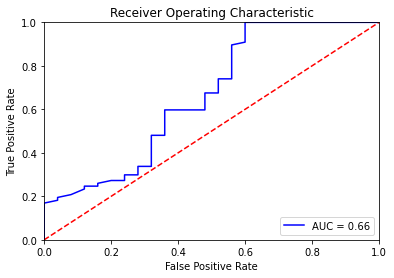

In [100]:
# Evaluate the Bert classifier
evaluate_roc(probs, y_val)

In [101]:
# Concatenate the train set and the validation set
full_train_data = torch.utils.data.ConcatDataset([train_data, val_data])
full_train_sampler = RandomSampler(full_train_data)
full_train_dataloader = DataLoader(full_train_data, sampler=full_train_sampler, batch_size=32)

# Train the Bert Classifier on the entire training data
set_seed(42)
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, full_train_dataloader, epochs=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/Users/swu/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be remov

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.537399   |     -      |     -     |  1326.46 
   1    |   31    |   0.380354   |     -      |     -     |  663.29  
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |   20    |   0.340110   |     -      |     -     |  1159.20 
   2    |   31    |   0.337821   |     -      |     -     |  604.80  
----------------------------------------------------------------------


Training complete


In [110]:
output_model = './sentiment.pth'

# save
def save(bert_classifier, optimizer):
    # save
    torch.save({
        'bert_classifier_state_dict': bert_classifier.state_dict(),
        'optimizer_state_dict': optimizer.state_dict()
    }, output_model)

save(bert_classifier, optimizer)

In [111]:
# load
checkpoint = torch.load(output_model, map_location='cpu')
bert_classifier.load_state_dict(checkpoint['bert_classifier_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])